In [1]:
import sys
import platform
import pandas as pd
import numpy as np

# 개발 환경 출력
print("개발 환경:")
print(f"OS: {platform.system()} {platform.version()}")
print(f"Python 버전: {sys.version}")
print(f"pandas 버전: {pd.__version__}")
print(f"numpy 버전: {np.__version__}")

#개발 환경:
#OS: Linux #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
#Python 버전: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
#pandas 버전: 2.2.2
#numpy 버전: 1.26.4

개발 환경:
OS: Linux #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Python 버전: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
pandas 버전: 2.2.2
numpy 버전: 1.26.4


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import sys
import matplotlib.pyplot as plt

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

plt.rcParams['font.family'] = 'NanumGothic'

Selecting previously unselected package fonts-nanum.
(Reading database ... 123635 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 데이터 불러오기

In [2]:
# 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# train 데이터 불러오기
df1 = pd.read_csv('/content/2021_raw.csv', encoding="cp949")
df2 = pd.read_csv('/content/2022_raw.csv', encoding="cp949")
df3 = pd.read_csv('/content/2023_raw.csv', encoding="cp949")
df4 = pd.read_csv('/content/2024_raw.csv', encoding="cp949")


# 기상 데이터 불러오기
tem = pd.read_csv('/content/대전 기온.csv', encoding='euc-kr')
pre = pd.read_csv('/content/대전 강수량.csv', encoding='euc-kr')
event = pd.read_csv('/content/대전 행사.csv', encoding='euc-kr')

# 공휴일 데이터 불러오기
holiday = pd.read_csv('/content/2022-2024 공휴일 데이터.csv')

## 연도별 승차 데이터 전처리


*   승차권 종류가 승차 통행량과 관련성이 없다고 판단해 제거 및 시간대별 데이터 합산 후, 역 번호 기준으로 그룹화 진행



In [3]:
import pandas as pd

# 1. 승차권 종류 컬럼 제거
df1.drop(columns=["승차권 종류"], inplace=True)

# 2. 데이터 필터링: 'ON_OFF' 값이 'ON'인 데이터만 선택
filtered_data = df1[df1["승ㆍ하차 구분"] == "승차"]

# 3. 시간대별 데이터 합산: 날짜와 역 번호 기준으로 그룹화
time_columns = ["CNT{:02d}".format(i) for i in range(1, 24)] + ["CNT00"]
grouped_data = (
    filtered_data.groupby(["BUSINESS_DAY", "STATION_NO"], as_index=False)[time_columns]
    .sum()
)

# 4. 'CNT00' 컬럼 이름 변경: 'CNT24'로 변경
grouped_data.rename(columns={"CNT00": "CNT24"}, inplace=True)

grouped_data

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24
0,20210101,1101,0,0,0,0,37,35,53,73,...,87,85,93,77,41,46,28,21,17,3
1,20210101,1102,0,0,0,0,11,16,14,28,...,31,34,34,28,13,19,21,9,2,0
2,20210101,1103,0,0,0,0,24,25,37,66,...,107,97,80,71,44,57,40,27,19,0
3,20210101,1104,0,0,0,0,10,27,56,93,...,315,276,285,229,170,154,182,113,41,0
4,20210101,1105,0,0,0,0,9,12,28,49,...,169,211,236,208,195,210,278,94,34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,20211231,1118,0,0,0,0,3,27,100,195,...,138,165,165,149,77,42,36,11,3,0
8026,20211231,1119,0,0,0,0,18,37,213,372,...,201,174,179,197,65,73,44,34,8,0
8027,20211231,1120,0,0,0,0,28,63,252,331,...,264,341,334,310,178,177,182,91,32,2
8028,20211231,1121,0,0,0,0,17,47,127,192,...,117,112,192,185,61,45,53,20,16,0


In [4]:
import pandas as pd

# 1. 승차권 종류 컬럼 제거
df2.drop(columns=["승차권 종류"], inplace=True)

# 2. 데이터 필터링: '승차' 값만 선택
filtered_data2 = df2[df2["승ㆍ하차 구분"] == "승차"]

# 3. 시간대별 데이터 합산: 날짜와 역 번호 기준으로 그룹화
time_columns = ["CNT{:02d}".format(i) for i in range(1, 24)] + ["CNT00"]
grouped_data2 = (
    filtered_data2.groupby(["BUSINESS_DAY", "STATION_NO"], as_index=False)[time_columns]
    .sum()
)

# BUSINESS_DAY를 날짜 형식으로 변환
grouped_data2["BUSINESS_DAY"] = pd.to_datetime(grouped_data2["BUSINESS_DAY"], format="%Y%m%d")

# 2022년 5월 1일 이후 데이터만 선택
grouped_data2 = grouped_data2[grouped_data2["BUSINESS_DAY"] >= "2022-05-01"]

# 4. 'CNT00' 컬럼 이름 변경: 'CNT24'로 변경
grouped_data2.rename(columns={"CNT00": "CNT24"}, inplace=True)

# 결과 확인
print(grouped_data2.head())
print(grouped_data2.shape)


     BUSINESS_DAY  STATION_NO  CNT01  CNT02  CNT03  CNT04  CNT05  CNT06  \
2640   2022-05-01        1101      0      0      0      0     53     83   
2641   2022-05-01        1102      0      0      0      0     26     41   
2642   2022-05-01        1103      0      0      0      8     32     80   
2643   2022-05-01        1104      0      0      0      0     13     91   
2644   2022-05-01        1105      0      0      0      0     18     27   

      CNT07  CNT08  ...  CNT15  CNT16  CNT17  CNT18  CNT19  CNT20  CNT21  \
2640     75    146  ...    156    155    127    140     83     73     36   
2641     42     66  ...     48     44     54     37     26     23     18   
2642     67    116  ...    156    126    143     86     83     52     33   
2643    138    230  ...    882    829    976    777    896   1060   1093   
2644     37     37  ...    413    457    546    515    417    367    384   

      CNT22  CNT23  CNT24  
2640     23     10      0  
2641      6      7      0  
2642    

In [5]:
import pandas as pd

# 1. 승차권 종류 컬럼 제거
df3.drop(columns=["승차권 종류"], inplace=True)

# 2. 데이터 필터링: 'ON_OFF' 값이 'ON'인 데이터만 선택
filtered_data3 = df3[df3["승ㆍ하차 구분"] == "승차"]

# 3. 시간대별 데이터 합산: 날짜와 역 번호 기준으로 그룹화
time_columns = ["CNT{:02d}".format(i) for i in range(1, 24)] + ["CNT00"]
grouped_data3 = (
    filtered_data3.groupby(["BUSINESS_DAY", "STATION_NO"], as_index=False)[time_columns]
    .sum()
)

# 4. 'CNT00' 컬럼 이름 변경: 'CNT24'로 변경
grouped_data3.rename(columns={"CNT00": "CNT24"}, inplace=True)

grouped_data3

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24
0,20230101,1101,0,0,0,0,37,39,47,115,...,139,159,124,125,82,86,35,18,12,0
1,20230101,1102,0,0,0,0,12,14,15,45,...,50,42,35,33,20,20,16,7,2,0
2,20230101,1103,0,0,0,0,31,34,54,78,...,101,126,127,73,62,57,39,33,19,1
3,20230101,1104,0,0,0,0,13,55,67,131,...,842,919,908,769,807,943,937,692,400,0
4,20230101,1105,0,0,0,0,38,46,27,44,...,340,411,396,461,403,334,278,195,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,20231231,1118,0,0,0,0,8,12,21,68,...,101,84,83,56,45,45,26,23,3,0
8026,20231231,1119,0,0,0,0,8,33,34,67,...,99,104,98,78,87,55,69,41,18,0
8027,20231231,1120,0,0,0,0,14,30,30,75,...,201,192,169,135,157,149,154,121,68,0
8028,20231231,1121,0,0,0,0,10,21,25,48,...,84,69,71,74,34,44,45,39,22,6


In [6]:
import pandas as pd

# 1. 승차권 종류 컬럼 제거
df4.drop(columns=["승차권 종류"], inplace=True)

# 2. 데이터 필터링: 'ON_OFF' 값이 'ON'인 데이터만 선택
filtered_data4 = df4[df4["승ㆍ하차 구분"] == "승차"]

# 3. 시간대별 데이터 합산: 날짜와 역 번호 기준으로 그룹화
time_columns = ["CNT{:02d}".format(i) for i in range(1, 24)] + ["CNT00"]
grouped_data4 = (
    filtered_data4.groupby(["BUSINESS_DAY", "STATION_NO"], as_index=False)[time_columns]
    .sum()
)

# 4. 'CNT00' 컬럼 이름 변경: 'CNT24'로 변경
grouped_data4.rename(columns={"CNT00": "CNT24"}, inplace=True)

grouped_data4

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24
0,20240101,1101,0,0,0,66,61,55,50,87,...,133,150,120,129,54,47,33,13,13,2
1,20240101,1102,0,0,0,0,18,106,21,40,...,47,53,41,37,30,15,16,8,3,0
2,20240101,1103,0,0,0,27,94,31,51,77,...,106,124,116,84,102,52,49,37,28,0
3,20240101,1104,0,0,0,5,16,129,103,163,...,927,903,852,739,748,908,706,640,327,0
4,20240101,1105,0,0,0,98,50,35,26,58,...,380,474,590,441,391,302,339,169,102,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,20240930,1118,0,0,0,0,20,42,135,286,...,170,286,329,277,142,76,66,29,4,0
6024,20240930,1119,0,0,0,1,29,75,272,507,...,151,196,226,253,128,64,61,41,23,0
6025,20240930,1120,0,0,0,0,40,112,341,507,...,230,276,359,414,154,192,171,151,78,3
6026,20240930,1121,0,0,0,0,40,79,170,253,...,127,143,216,481,152,113,82,40,25,0


In [7]:
import pandas as pd

# 2022, 2023, 2024 데이터를 concat으로 합치기
all_data = pd.concat([grouped_data2, grouped_data3, grouped_data4], axis=0)

# 인덱스 재설정 (기존 인덱스를 무시하고 새로운 연속적인 인덱스를 설정)
all_data.reset_index(drop=True, inplace=True)
all_data

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24
0,2022-05-01 00:00:00,1101,0,0,0,0,53,83,75,146,...,156,155,127,140,83,73,36,23,10,0
1,2022-05-01 00:00:00,1102,0,0,0,0,26,41,42,66,...,48,44,54,37,26,23,18,6,7,0
2,2022-05-01 00:00:00,1103,0,0,0,8,32,80,67,116,...,156,126,143,86,83,52,33,33,19,0
3,2022-05-01 00:00:00,1104,0,0,0,0,13,91,138,230,...,882,829,976,777,896,1060,1093,792,466,0
4,2022-05-01 00:00:00,1105,0,0,0,0,18,27,37,37,...,413,457,546,515,417,367,384,262,111,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,20240930,1118,0,0,0,0,20,42,135,286,...,170,286,329,277,142,76,66,29,4,0
19444,20240930,1119,0,0,0,1,29,75,272,507,...,151,196,226,253,128,64,61,41,23,0
19445,20240930,1120,0,0,0,0,40,112,341,507,...,230,276,359,414,154,192,171,151,78,3
19446,20240930,1121,0,0,0,0,40,79,170,253,...,127,143,216,481,152,113,82,40,25,0


### 추가 외부 데이터 2024-10월 수집 후 전처리

In [8]:
df6 = pd.read_csv('/content/대전교통공사_시간대별 승하차인원_20241031.csv', encoding = "euc-kr")
df6

,날짜,역번호,역명,구분,03-04시,04-05시,05-06시,06-07시,07-08시,08-09시,...,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-00시,00-01시,01-02시,02-03시
0,2024-01-01,1101,판암,승차,0,66,61,55,50,87,...,120,129,54,47,33,13,13,2,0,0
1,2024-01-01,1101,판암,하차,0,53,50,74,48,51,...,145,130,111,85,73,94,62,17,0,0
2,2024-01-01,1102,신흥,승차,0,0,18,106,21,40,...,41,37,30,15,16,8,3,0,0,0
3,2024-01-01,1102,신흥,하차,0,0,9,104,17,15,...,45,69,39,37,27,39,20,6,0,0
4,2024-01-01,1103,대동,승차,0,27,94,31,51,77,...,116,84,102,52,49,37,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,2024-10-31,1120,노은,하차,0,0,16,43,170,350,...,401,608,316,208,184,181,85,14,0,0
12712,2024-10-31,1121,지족,승차,0,0,30,50,186,270,...,201,494,148,88,87,31,25,0,0,0
12713,2024-10-31,1121,지족,하차,0,0,13,40,108,610,...,163,260,111,84,110,78,42,17,0,0
12714,2024-10-31,1122,반석,승차,0,1,81,235,966,1206,...,596,865,318,293,274,208,122,0,0,0


In [9]:
# BUSINESS_DAY를 문자열로 처리하여 2024년 10월 필터링
df2024_10 = df6[df6["날짜"].str.startswith("2024-10")]
df2024_10

,날짜,역번호,역명,구분,03-04시,04-05시,05-06시,06-07시,07-08시,08-09시,...,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-00시,00-01시,01-02시,02-03시
11352,2024-10-01,1101,판암,승차,0,3,60,124,201,241,...,171,144,78,38,49,28,12,0,0,0
11353,2024-10-01,1101,판암,하차,0,3,6,58,93,145,...,244,236,135,138,110,114,57,21,0,0
11354,2024-10-01,1102,신흥,승차,0,0,37,39,95,142,...,66,58,44,30,13,8,4,0,0,0
11355,2024-10-01,1102,신흥,하차,0,0,7,30,35,48,...,117,100,88,64,64,55,22,8,0,0
11356,2024-10-01,1103,대동,승차,0,0,63,99,155,247,...,195,172,79,59,56,41,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,2024-10-31,1120,노은,하차,0,0,16,43,170,350,...,401,608,316,208,184,181,85,14,0,0
12712,2024-10-31,1121,지족,승차,0,0,30,50,186,270,...,201,494,148,88,87,31,25,0,0,0
12713,2024-10-31,1121,지족,하차,0,0,13,40,108,610,...,163,260,111,84,110,78,42,17,0,0
12714,2024-10-31,1122,반석,승차,0,1,81,235,966,1206,...,596,865,318,293,274,208,122,0,0,0


In [10]:
import pandas as pd

# 1. 컬럼 이름 변경: '날짜' -> 'BUSINESS_DAY', '역번호' -> 'STATION_NO'
df2024_10.rename(columns={"날짜": "BUSINESS_DAY", "역번호": "STATION_NO"}, inplace=True)

# 2. '역명' 컬럼 삭제 (이 코드는 주석 처리됨)
# df2024_10.drop(columns=["역명"], inplace=True)

# 3. 시간대 컬럼 이름 변경
df2024_10.rename(columns={
    "03-04시": "CNT03", "04-05시": "CNT04", "05-06시": "CNT05", "06-07시": "CNT06", "07-08시": "CNT07",
    "08-09시": "CNT08", "09-10시": "CNT09", "10-11시": "CNT10", "11-12시": "CNT11", "12-13시": "CNT12",
    "13-14시": "CNT13", "14-15시": "CNT14", "15-16시": "CNT15", "16-17시": "CNT16", "17-18시": "CNT17",
    "18-19시": "CNT18", "19-20시": "CNT19", "20-21시": "CNT20", "21-22시": "CNT21", "22-23시": "CNT22",
    "23-00시": "CNT23", "00-01시": "CNT00", "01-02시": "CNT01", "02-03시": "CNT02"
}, inplace=True)


# 4. 데이터 필터링: '승ㆍ하차 구분' 값이 '승차'인 데이터만 선택
filtered_data10 = df2024_10[df2024_10["구분"] == "승차"]

# 5. 시간대 컬럼 리스트 생성
time_columns = ["CNT{:02d}".format(i) for i in range(1, 24)] + ["CNT00"]

# 6. 시간대별 데이터 합산: 날짜와 역 번호 기준으로 그룹화
grouped_data10 = (
    filtered_data10.groupby(["BUSINESS_DAY", "STATION_NO"], as_index=False)[time_columns]
    .sum()
)

# 7. 'CNT00' 컬럼 이름 변경: 'CNT24'로 변경
grouped_data10.rename(columns={"CNT00": "CNT24"}, inplace=True)

# 결과 확인
grouped_data10


<ipython-input-10-a930330c17d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2024_10.rename(columns={"날짜": "BUSINESS_DAY", "역번호": "STATION_NO"}, inplace=True)
<ipython-input-10-a930330c17d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2024_10.rename(columns={


,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24
0,2024-10-01,1101,0,0,0,3,60,124,201,241,...,173,169,171,144,78,38,49,28,12,0
1,2024-10-01,1102,0,0,0,0,37,39,95,142,...,49,90,66,58,44,30,13,8,4,0
2,2024-10-01,1103,0,0,0,0,63,99,155,247,...,151,171,195,172,79,59,56,41,18,1
3,2024-10-01,1104,0,0,0,4,22,122,335,374,...,677,678,646,578,522,462,473,367,183,0
4,2024-10-01,1105,0,0,0,0,21,29,57,113,...,469,546,591,595,429,417,316,184,101,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,2024-10-31,1118,0,0,0,0,14,32,146,290,...,218,353,306,274,131,66,66,44,8,0
678,2024-10-31,1119,0,0,0,0,28,70,273,455,...,153,207,220,284,128,82,67,39,16,1
679,2024-10-31,1120,0,0,0,0,40,88,321,506,...,177,317,345,390,230,179,198,188,84,5
680,2024-10-31,1121,0,0,0,0,30,50,186,270,...,136,190,201,494,148,88,87,31,25,0


In [11]:
import pandas as pd

# 2022, 2023, 2024 데이터를 concat으로 합치기
all_data2 = pd.concat([all_data, grouped_data10], axis=0)

# 인덱스 재설정 (기존 인덱스를 무시하고 새로운 연속적인 인덱스를 설정)
all_data2.reset_index(drop=True, inplace=True)
all_data2

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24
0,2022-05-01 00:00:00,1101,0,0,0,0,53,83,75,146,...,156,155,127,140,83,73,36,23,10,0
1,2022-05-01 00:00:00,1102,0,0,0,0,26,41,42,66,...,48,44,54,37,26,23,18,6,7,0
2,2022-05-01 00:00:00,1103,0,0,0,8,32,80,67,116,...,156,126,143,86,83,52,33,33,19,0
3,2022-05-01 00:00:00,1104,0,0,0,0,13,91,138,230,...,882,829,976,777,896,1060,1093,792,466,0
4,2022-05-01 00:00:00,1105,0,0,0,0,18,27,37,37,...,413,457,546,515,417,367,384,262,111,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,2024-10-31,1118,0,0,0,0,14,32,146,290,...,218,353,306,274,131,66,66,44,8,0
20126,2024-10-31,1119,0,0,0,0,28,70,273,455,...,153,207,220,284,128,82,67,39,16,1
20127,2024-10-31,1120,0,0,0,0,40,88,321,506,...,177,317,345,390,230,179,198,188,84,5
20128,2024-10-31,1121,0,0,0,0,30,50,186,270,...,136,190,201,494,148,88,87,31,25,0


In [12]:
# 1. BUSINESS_DAY 컬럼을 문자열로 변환
all_data2['BUSINESS_DAY'] = all_data2['BUSINESS_DAY'].astype(str)

# 2. 시간 정보 (' 00:00:00') 제거
all_data2['BUSINESS_DAY'] = all_data2['BUSINESS_DAY'].str.split(' ').str[0]

# 3. 'YYYYMMDD'를 'YYYY-MM-DD' 형식으로 변경
all_data2['BUSINESS_DAY'] = all_data2['BUSINESS_DAY'].apply(
    lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}" if len(x) == 8 else x
)

# 4. datetime 형식으로 변환
all_data2['BUSINESS_DAY'] = pd.to_datetime(all_data2['BUSINESS_DAY'], format='%Y-%m-%d', errors='coerce')

# 결과 확인
print(all_data2['BUSINESS_DAY'].head())


0   2022-05-01
1   2022-05-01
2   2022-05-01
3   2022-05-01
4   2022-05-01
Name: BUSINESS_DAY, dtype: datetime64[ns]


#### 전체 승차량 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기
data1 = pd.read_csv('/content/2018to2024.csv', encoding='cp949')  # 2018, 2019, 2022, 2023, 2024년 데이터
data2 = pd.read_csv('/content/시간대별 승차 인원_2020년_2021년01_12월.csv', encoding='cp949')  # 2020, 2021년 데이터

# data1의 'BUSINESS_DAY'를 datetime 형식으로 변환
data1['BUSINESS_DAY'] = pd.to_datetime(data1['癤풟USINESS_DAY'])

# data2의 '날짜'를 datetime 형식으로 변환하고 열 이름 변경
data2['날짜'] = pd.to_datetime(data2['날짜'])
data2.rename(columns={'날짜': 'BUSINESS_DAY', '역번호': 'STATION_NO'}, inplace=True)

# data2에서 승차 데이터만 선택
data2 = data2[data2['구분'] == '승차']

# data2에서 시간대별 승차량 합산
time_columns = [f"{str(i).zfill(2)}_{str(i+1).zfill(2)}시" for i in range(23)] + ['23_00시']
data2['total_passengers'] = data2[time_columns].sum(axis=1)

# data1에서 일별 총 승차량 가져오기
data1['total_passengers'] = data1.filter(regex='^CNT').sum(axis=1)

# 두 데이터셋을 통합
all_data = pd.concat([data1[['BUSINESS_DAY', 'STATION_NO', 'total_passengers']],
                       data2[['BUSINESS_DAY', 'STATION_NO', 'total_passengers']]],
                      ignore_index=True)

# 일별 데이터로 그룹화하여 총 승차량 계산
daily_data = all_data.groupby(['BUSINESS_DAY'])['total_passengers'].sum().reset_index()
# 요일 정보 추가
daily_data['WEEKDAY'] = daily_data['BUSINESS_DAY'].dt.day_name()

# 요일별 색상 매핑 정의
color_map = {
    'Monday': 'blue',
    'Tuesday': 'orange',
    'Wednesday': 'green',
    'Thursday': 'pink',
    'Friday': 'purple',
    'Saturday': 'brown',
    'Sunday': 'red'
}

# 시계열 시각화 (선만 그리기)
plt.figure(figsize=(15, 7))
for weekday, color in color_map.items():
    subset = daily_data[daily_data['WEEKDAY'] == weekday]
    plt.plot(subset['BUSINESS_DAY'], subset['total_passengers'], label=weekday, color=color)

plt.title('일별 총 승차량 (2018-2024)', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('총 승차량', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='요일')
plt.tight_layout()
plt.show()

In [ ]:
#금토일만 시각화

# data1의 'BUSINESS_DAY'를 datetime 형식으로 변환
data1['BUSINESS_DAY'] = pd.to_datetime(data1['癤풟USINESS_DAY'])

# data2의 '날짜'를 datetime 형식으로 변환하고 열 이름 변경
data2['날짜'] = pd.to_datetime(data2['날짜'])
data2.rename(columns={'날짜': 'BUSINESS_DAY', '역번호': 'STATION_NO'}, inplace=True)

# data2에서 하차 데이터를 제외하고 승차 데이터만 선택
data2 = data2[data2['구분'] == '승차']

# data2에서 시간대별 승차량 합산
time_columns = [f"{str(i).zfill(2)}_{str(i+1).zfill(2)}시" for i in range(23)] + ['23_00시']
data2['total_passengers'] = data2[time_columns].sum(axis=1)

# data1에서 일별 총 승차량 가져오기
data1['total_passengers'] = data1.filter(regex='^CNT').sum(axis=1)

# 두 데이터셋을 통합
all_data = pd.concat([data1[['BUSINESS_DAY', 'STATION_NO', 'total_passengers']],
                       data2[['BUSINESS_DAY', 'STATION_NO', 'total_passengers']]],
                      ignore_index=True)

# 일별 데이터로 그룹화하여 총 승차량 계산
daily_data = all_data.groupby(['BUSINESS_DAY'])['total_passengers'].sum().reset_index()

# 요일 정보 추가
daily_data['WEEKDAY'] = daily_data['BUSINESS_DAY'].dt.day_name()

# 금요일, 토요일, 일요일 데이터만 선택
weekend_data = daily_data[daily_data['WEEKDAY'].isin(['Friday', 'Saturday', 'Sunday'])]

# 요일별 색상 매핑 정의
color_map = {
    'Friday': 'red',
    'Saturday': 'blue',
    'Sunday': 'green'
}

# 시계열 시각화 (금토일만)
plt.figure(figsize=(15, 7))
for weekday, color in color_map.items():
    subset = weekend_data[weekend_data['WEEKDAY'] == weekday]
    plt.plot(subset['BUSINESS_DAY'], subset['total_passengers'], label=weekday, color=color)

plt.title('금토일 일별 총 승차량 (2018-2024)', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('총 승차량', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='요일')
plt.tight_layout()
plt.show()


## 공휴일 추가

In [13]:
import pandas as pd

# 공휴일 데이터 전처리
holiday['date'] = pd.to_datetime(holiday['날짜'])
holidays = holiday.set_index('date')

# 데이터 병합을 위한 전처리
all_data2['BUSINESS_DAY'] = pd.to_datetime(all_data2['BUSINESS_DAY'], errors='coerce')
data_long = all_data2.melt(
    id_vars=['BUSINESS_DAY', 'STATION_NO'],  # 고정 컬럼: 날짜와 역번호
    value_vars=[f'CNT{i:02d}' for i in range(1, 25)],  # 시간대별 승차인원 데이터
    var_name='시간대',  # 시간대 이름 컬럼
    value_name='승차인원'  # 승차인원 데이터
)

# 날짜 및 시간 생성
data_long['시간'] = data_long['시간대'].str.extract('(\d+)').astype(int)  # CNT에서 숫자 추출
data_long['ds'] = data_long['BUSINESS_DAY'] + pd.to_timedelta(data_long['시간'], unit='h')  # 날짜+시간
data_long = data_long.rename(columns={'STATION_NO': '역번호', '승차인원': 'y'})  # 컬럼 이름 변경

# 공휴일 여부 추가
data_long['is_holiday'] = data_long['ds'].dt.date.isin(holidays.index.date).astype(int)

# 기존 데이터에도 공휴일 여부 추가
all_data2['is_holiday'] = all_data2['BUSINESS_DAY'].dt.date.isin(holidays.index.date).astype(int)

# 1시에서 4시 데이터 제외
data_long = data_long[~data_long['시간'].between(1, 4)]  # 시간(1~4)을 제외한 데이터


In [14]:
all_data2

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24,is_holiday
0,2022-05-01,1101,0,0,0,0,53,83,75,146,...,155,127,140,83,73,36,23,10,0,0
1,2022-05-01,1102,0,0,0,0,26,41,42,66,...,44,54,37,26,23,18,6,7,0,0
2,2022-05-01,1103,0,0,0,8,32,80,67,116,...,126,143,86,83,52,33,33,19,0,0
3,2022-05-01,1104,0,0,0,0,13,91,138,230,...,829,976,777,896,1060,1093,792,466,0,0
4,2022-05-01,1105,0,0,0,0,18,27,37,37,...,457,546,515,417,367,384,262,111,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,2024-10-31,1118,0,0,0,0,14,32,146,290,...,353,306,274,131,66,66,44,8,0,0
20126,2024-10-31,1119,0,0,0,0,28,70,273,455,...,207,220,284,128,82,67,39,16,1,0
20127,2024-10-31,1120,0,0,0,0,40,88,321,506,...,317,345,390,230,179,198,188,84,5,0
20128,2024-10-31,1121,0,0,0,0,30,50,186,270,...,190,201,494,148,88,87,31,25,0,0


### 행사 데이터로 파생 변수 생성

In [15]:
# event 변수가 데이터프레임인지 확인
print(type(event))

# event 데이터가 문자열로 잘못 설정된 경우, 다시 로드
file_path = '/content/대전 행사.csv'
event = pd.read_csv(file_path, encoding='cp949')

# 데이터 확인
print(event.head())


<class 'pandas.core.frame.DataFrame'>
       행사 시작일      행사 종료일   역사 행사구분           단체명                       문화행사명  \
0  2021-01-01  2021-01-15  대전역   전시           개인전                  조선소나무사진전시회   
1  2021-01-11  2021-01-22  판암역   전시       판암사회복지관  웰 에이징 특화 프로그램 실버 패션쇼 화보 전시   
2  2021-01-18  2021-01-29  시청역   전시  대전서구정신건강복지센터      코로나 속 마음건강챙김 공모전 작품전시회   
3  2021-01-29  2021-02-09  구암역   전시   유성구정신건강복지센터   코로나속 마음건강챙김 공모전 수상작 작품전시회   
4  2021-02-01  2021-03-31  노은역   전시       대전유성소방서                심폐소생술 체험관 운영   

   Unnamed: 6  Unnamed: 7  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  


In [16]:
# 승차량 데이터 로드
main_data = all_data2
main_data['BUSINESS_DAY'] = pd.to_datetime(main_data['BUSINESS_DAY'])

# '역사' 열을 명확히 문자열로 변환
event['역사'] = event['역사'].astype(str)
event['START_DATE'] = pd.to_datetime(event['행사 시작일'])
event['END_DATE'] = pd.to_datetime(event['행사 종료일'])

# 역 이름 -> 숫자 매핑
station_mapping = {
    "판암역": 1101, "신흥역": 1102, "대동역": 1103, "대전역": 1104, "중앙로역": 1105,
    "중구청역": 1106, "서대전네거리역": 1107, "오룡역": 1108, "용문역": 1109, "탄방역": 1110,
    "시청역": 1111, "정부청사역": 1112, "갈마역": 1113, "월평역": 1114, "갑천역": 1115,
    "유성온천역": 1116, "구암역": 1117, "현충원역": 1118, "월드컵경기장역": 1119, "노은역": 1120,
    "지족역": 1121, "반석역": 1122
}

# 역사 열을 숫자로 변환
event['STATION_NO'] = event['역사'].map(station_mapping)

def get_event_weight(event_name):
    if isinstance(event_name, str):
        if '0시축제' in event_name or '빵축제' in event_name:
            return 5  # 대규모 행사
        elif '축구' in event_name or '와인축제' in event_name:
            return 3  # 중규모 행사
    return 1  # 소규모 행사 또는 문자열이 아닌 경우


# 행사 데이터에 가중치 추가
event['EVENT_WEIGHT'] = event['문화행사명'].apply(get_event_weight)

# 1. 행사 기간을 날짜 리스트로 확장
event_rows = []
for _, row in event.iterrows():
    for date in pd.date_range(start=row['START_DATE'], end=row['END_DATE']):
        event_rows.append({'DATE': date, 'STATION_NO': row['STATION_NO'], 'EVENT_WEIGHT': row['EVENT_WEIGHT']})

expanded_event_data = pd.DataFrame(event_rows)


# 2. 행사 여부를 승차량 데이터에 병합
merged_data = pd.merge(
    main_data,
    expanded_event_data,
    how='left',
    left_on=['BUSINESS_DAY', 'STATION_NO'],
    right_on=['DATE', 'STATION_NO']
)

# 3. 행사 가중치 처리(행사 없으면 0처리)
merged_data['EVENT_WEIGHT'] = merged_data['EVENT_WEIGHT'].fillna(0)

# **역 가중치 추가**: 행사 역에 해당하면 추가 가중치 부여
merged_data['FINAL_WEIGHT'] = merged_data.apply(
    lambda row: row['EVENT_WEIGHT'] * 1.5 if row['EVENT_WEIGHT'] > 0 else 0, axis=1
)
# 4. 최종 데이터 정리 (불필요한 열 제거)
merged_data.drop(columns=['DATE'], inplace=True)

merged_data

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24,is_holiday,EVENT_WEIGHT,FINAL_WEIGHT
0,2022-05-01,1101,0,0,0,0,53,83,75,146,...,140,83,73,36,23,10,0,0,0.0,0.0
1,2022-05-01,1102,0,0,0,0,26,41,42,66,...,37,26,23,18,6,7,0,0,0.0,0.0
2,2022-05-01,1103,0,0,0,8,32,80,67,116,...,86,83,52,33,33,19,0,0,0.0,0.0
3,2022-05-01,1104,0,0,0,0,13,91,138,230,...,777,896,1060,1093,792,466,0,0,0.0,0.0
4,2022-05-01,1105,0,0,0,0,18,27,37,37,...,515,417,367,384,262,111,14,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,2024-10-31,1118,0,0,0,0,14,32,146,290,...,274,131,66,66,44,8,0,0,0.0,0.0
20770,2024-10-31,1119,0,0,0,0,28,70,273,455,...,284,128,82,67,39,16,1,0,0.0,0.0
20771,2024-10-31,1120,0,0,0,0,40,88,321,506,...,390,230,179,198,188,84,5,0,0.0,0.0
20772,2024-10-31,1121,0,0,0,0,30,50,186,270,...,494,148,88,87,31,25,0,0,0.0,0.0


In [17]:
merged_data

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24,is_holiday,EVENT_WEIGHT,FINAL_WEIGHT
0,2022-05-01,1101,0,0,0,0,53,83,75,146,...,140,83,73,36,23,10,0,0,0.0,0.0
1,2022-05-01,1102,0,0,0,0,26,41,42,66,...,37,26,23,18,6,7,0,0,0.0,0.0
2,2022-05-01,1103,0,0,0,8,32,80,67,116,...,86,83,52,33,33,19,0,0,0.0,0.0
3,2022-05-01,1104,0,0,0,0,13,91,138,230,...,777,896,1060,1093,792,466,0,0,0.0,0.0
4,2022-05-01,1105,0,0,0,0,18,27,37,37,...,515,417,367,384,262,111,14,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,2024-10-31,1118,0,0,0,0,14,32,146,290,...,274,131,66,66,44,8,0,0,0.0,0.0
20770,2024-10-31,1119,0,0,0,0,28,70,273,455,...,284,128,82,67,39,16,1,0,0.0,0.0
20771,2024-10-31,1120,0,0,0,0,40,88,321,506,...,390,230,179,198,188,84,5,0,0.0,0.0
20772,2024-10-31,1121,0,0,0,0,30,50,186,270,...,494,148,88,87,31,25,0,0,0.0,0.0


In [18]:
# 'EVENT' 컬럼을 기본값 0으로 설정
merged_data['EVENT'] = 0

# 행사 데이터에서 각 행사에 대해 'BUSINESS_DAY'가 행사 기간 내에 있는지 확인
for _, event in event.iterrows():
    # 각 행사에 대해 'BUSINESS_DAY'가 행사 기간 내에 있는지 확인
    mask = (merged_data['BUSINESS_DAY'] >= event['START_DATE']) & \
           (merged_data['BUSINESS_DAY'] <= event['END_DATE'])

    # 해당 조건을 만족하는 'EVENT' 컬럼에 1을 할당
    merged_data.loc[mask, 'EVENT'] = 1

####  t-통계량, p-벨류

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# 2023년 데이터 추출
data_2023 = all_data[all_data['BUSINESS_DAY'].dt.year == 2023]

# 월별 t통계량과 p값 계산
results = []
for month in range(1, 13):
    month_data = data_2023[data_2023['BUSINESS_DAY'].dt.month == month]

    time_columns = [f'CNT{i:02d}' for i in range(1, 25)]
    weekday_data = month_data[month_data['is_weekend'] == 0][time_columns].sum(axis=1)
    weekend_data = month_data[month_data['is_weekend'] == 1][time_columns].sum(axis=1)

    # t-검정 수행
    t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data)

    results.append({
        'Month': month,
        't-statistic': t_stat,
        'p-value': p_value
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
print(results_df)
# 두 그룹 간 차이가 크다는 것을 의미합니다.

#  Month  t-statistic       p-value
#0       1     8.515106  1.043473e-16
#1       2     6.700788  4.696700e-11
#2       3     6.615625  7.497513e-11
#3       4     7.384750  4.630213e-13
#4       5     6.409293  2.732702e-10
#5       6     6.682239  5.013315e-11
#6       7     8.386274  2.809232e-16
#7       8     4.942728  9.643534e-07
#8       9     6.006137  3.038910e-09
#9      10     5.600679  3.022185e-08
#10     11     7.071291  3.771934e-12
#11     12     7.630877  6.693079e-14

In [ ]:
#평일 - 행사 유무에 따른 t-검정 결과:
#t-통계량: 52.3126
#p-값: 0.0000e+00

#주말 - 행사 유무에 따른 t-검정 결과:
#t-통계량: 32.4287
#p-값: 5.7440e-214

import pandas as pd
import numpy as np
from scipy import stats

# 데이터 준비
all_data['weekday'] = pd.to_datetime(all_data['BUSINESS_DAY']).dt.dayofweek
all_data['is_weekend'] = all_data['weekday'].isin([5, 6]).astype(int)
all_data['total_passengers'] = all_data.filter(regex='^CNT').sum(axis=1)

# 평일/주말 및 행사 유무에 따른 그룹 분리
weekday_event = all_data[(all_data['is_weekend'] == 0) & (all_data['EVENT_WEIGHT'] > 0)]['total_passengers']
weekday_no_event = all_data[(all_data['is_weekend'] == 0) & (all_data['EVENT_WEIGHT'] == 0)]['total_passengers']
weekend_event = all_data[(all_data['is_weekend'] == 1) & (all_data['EVENT_WEIGHT'] > 0)]['total_passengers']
weekend_no_event = all_data[(all_data['is_weekend'] == 1) & (all_data['EVENT_WEIGHT'] == 0)]['total_passengers']

# t-검정 수행
weekday_ttest = stats.ttest_ind(weekday_event, weekday_no_event)
weekend_ttest = stats.ttest_ind(weekend_event, weekend_no_event)

print("평일 - 행사 유무에 따른 t-검정 결과:")
print(f"t-통계량: {weekday_ttest.statistic:.4f}")
print(f"p-값: {weekday_ttest.pvalue:.4e}")

print("\n주말 - 행사 유무에 따른 t-검정 결과:")
print(f"t-통계량: {weekend_ttest.statistic:.4f}")
print(f"p-값: {weekend_ttest.pvalue:.4e}")


In [ ]:
# 10-12월 평일 - 행사 유무에 따른 t-검정 결과:
# t-통계량: 18.1811
# p-값: 3.1351e-70

# 10-12월 주말 - 행사 유무에 따른 t-검정 결과:
# t-통계량: 10.1625
# p-값: 2.2567e-23


# 데이터 준비
all_data['BUSINESS_DAY'] = pd.to_datetime(all_data['BUSINESS_DAY'])
all_data['weekday'] = all_data['BUSINESS_DAY'].dt.dayofweek
all_data['is_weekend'] = all_data['weekday'].isin([5, 6]).astype(int)
all_data['total_passengers'] = all_data.filter(regex='^CNT').sum(axis=1)

# 10, 11, 12월 데이터만 선택
all_data_q4 = all_data[all_data['BUSINESS_DAY'].dt.month.isin([10, 11, 12])]

# 평일/주말 및 행사 유무에 따른 그룹 분리
weekday_event = all_data_q4[(all_data_q4['is_weekend'] == 0) & (all_data_q4['EVENT_WEIGHT'] > 0)]['total_passengers']
weekday_no_event = all_data_q4[(all_data_q4['is_weekend'] == 0) & (all_data_q4['EVENT_WEIGHT'] == 0)]['total_passengers']
weekend_event = all_data_q4[(all_data_q4['is_weekend'] == 1) & (all_data_q4['EVENT_WEIGHT'] > 0)]['total_passengers']
weekend_no_event = all_data_q4[(all_data_q4['is_weekend'] == 1) & (all_data_q4['EVENT_WEIGHT'] == 0)]['total_passengers']

# t-검정 수행
weekday_ttest = stats.ttest_ind(weekday_event, weekday_no_event)
weekend_ttest = stats.ttest_ind(weekend_event, weekend_no_event)

print("10-12월 평일 - 행사 유무에 따른 t-검정 결과:")
print(f"t-통계량: {weekday_ttest.statistic:.4f}")
print(f"p-값: {weekday_ttest.pvalue:.4e}")

print("\n10-12월 주말 - 행사 유무에 따른 t-검정 결과:")
print(f"t-통계량: {weekend_ttest.statistic:.4f}")
print(f"p-값: {weekend_ttest.pvalue:.4e}")


# 평일과 주말 모두 행사 유무가 승차 인원에 매우 유의미한 영향을 미칩니다.
# 행사의 영향이 평일에 더 크게 나타나는 것

### 요일 파생 변수 생성

In [19]:
# 'BUSINESS_DAY'를 datetime 형식으로 변환
merged_data['BUSINESS_DAY'] = pd.to_datetime(merged_data['BUSINESS_DAY'])

# 'BUSINESS_DAY'에서 요일을 추출하여 'weekday' 컬럼 추가 (월요일부터 일요일까지 문자열)
merged_data['WEEKDAY'] = merged_data['BUSINESS_DAY'].dt.day_name()

merged_data

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT20,CNT21,CNT22,CNT23,CNT24,is_holiday,EVENT_WEIGHT,FINAL_WEIGHT,EVENT,WEEKDAY
0,2022-05-01,1101,0,0,0,0,53,83,75,146,...,73,36,23,10,0,0,0.0,0.0,0,Sunday
1,2022-05-01,1102,0,0,0,0,26,41,42,66,...,23,18,6,7,0,0,0.0,0.0,0,Sunday
2,2022-05-01,1103,0,0,0,8,32,80,67,116,...,52,33,33,19,0,0,0.0,0.0,0,Sunday
3,2022-05-01,1104,0,0,0,0,13,91,138,230,...,1060,1093,792,466,0,0,0.0,0.0,0,Sunday
4,2022-05-01,1105,0,0,0,0,18,27,37,37,...,367,384,262,111,14,0,0.0,0.0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,2024-10-31,1118,0,0,0,0,14,32,146,290,...,66,66,44,8,0,0,0.0,0.0,1,Thursday
20770,2024-10-31,1119,0,0,0,0,28,70,273,455,...,82,67,39,16,1,0,0.0,0.0,1,Thursday
20771,2024-10-31,1120,0,0,0,0,40,88,321,506,...,179,198,188,84,5,0,0.0,0.0,1,Thursday
20772,2024-10-31,1121,0,0,0,0,30,50,186,270,...,88,87,31,25,0,0,0.0,0.0,1,Thursday


In [20]:
# 'CNT01'부터 'CNT24'까지의 컬럼을 합산하여 'total_ridership' 컬럼을 생성
cnt_columns = [f"CNT{i:02d}" for i in range(1, 25)]  # CNT01 ~ CNT24 컬럼 리스트 생성
merged_data['total_ridership'] = merged_data[cnt_columns].sum(axis=1)  # 각 행에서 CNT01~CNT24 합산

merged_data

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT21,CNT22,CNT23,CNT24,is_holiday,EVENT_WEIGHT,FINAL_WEIGHT,EVENT,WEEKDAY,total_ridership
0,2022-05-01,1101,0,0,0,0,53,83,75,146,...,36,23,10,0,0,0.0,0.0,0,Sunday,2400
1,2022-05-01,1102,0,0,0,0,26,41,42,66,...,18,6,7,0,0,0.0,0.0,0,Sunday,836
2,2022-05-01,1103,0,0,0,8,32,80,67,116,...,33,33,19,0,0,0.0,0.0,0,Sunday,2035
3,2022-05-01,1104,0,0,0,0,13,91,138,230,...,1093,792,466,0,0,0.0,0.0,0,Sunday,11240
4,2022-05-01,1105,0,0,0,0,18,27,37,37,...,384,262,111,14,0,0.0,0.0,0,Sunday,4569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,2024-10-31,1118,0,0,0,0,14,32,146,290,...,66,44,8,0,0,0.0,0.0,1,Thursday,2888
20770,2024-10-31,1119,0,0,0,0,28,70,273,455,...,67,39,16,1,0,0.0,0.0,1,Thursday,2851
20771,2024-10-31,1120,0,0,0,0,40,88,321,506,...,198,188,84,5,0,0.0,0.0,1,Thursday,4284
20772,2024-10-31,1121,0,0,0,0,30,50,186,270,...,87,31,25,0,0,0.0,0.0,1,Thursday,2615


In [ ]:
df = merged_data

## 기상 데이터 전처리 및 EDA

### 기상 데이터 전처리

#### 기온 데이터 전처리

In [ ]:
tem

In [ ]:
tem.drop(['\t\t지점번호', '지점명' ,'최저기온시각일교차', '\t최고기온시각', 'Unnamed: 8'], axis=1, inplace=True)
tem = tem.dropna()

In [ ]:
tem

#### 강수량 데이터 전처리

In [ ]:
pre

In [ ]:
pre.drop(['\t지점번호', '지점명' ,'1시간최다강수량(mm)', '1시간최다강수량시각'], axis=1, inplace=True)
pre = pre.drop(pre.index[1414:])

# '강수량(mm)' 컬럼의 NaN 값을 0으로 변경
pre['강수량(mm)'] = pre['강수량(mm)'].fillna(0)

In [21]:
pre

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,\t133,대전,2021-01-01,2.1,NaN,NaN
1,\t133,대전,2021-01-02,0.0,NaN,NaN
2,\t133,대전,2021-01-03,NaN,NaN,NaN
3,\t133,대전,2021-01-04,NaN,NaN,NaN
4,\t133,대전,2021-01-05,0.1,NaN,NaN
...,...,...,...,...,...,...
1415,\t,NaN,NaN,NaN,NaN,NaN
1416,\t,NaN,NaN,NaN,NaN,NaN
1417,\t\t,NaN,NaN,NaN,NaN,NaN
1418,\t,NaN,NaN,NaN,NaN,NaN


#### 데이터 합치기 및 연도별로 데이터 구분

In [84]:
merged_data = tem.merge(pre, on='일시', how='outer')

In [85]:
merged_data

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,지점번호,지점명_x,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8,\t지점번호,지점명_y,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,133.0,대전,2021-01-01,-4.6,-1.2,15:39,-9.7,7:24,8.5,\t133,대전,2.1,NaN,NaN
1,133.0,대전,2021-01-02,-3.5,1.4,14:43,-7.1,8:03,8.5,\t133,대전,0.0,NaN,NaN
2,133.0,대전,2021-01-03,-4.1,0.0,13:14,-8.5,7:55,8.5,\t133,대전,NaN,NaN,NaN
3,133.0,대전,2021-01-04,-2.8,2.5,16:20,-8.4,7:28,10.9,\t133,대전,NaN,NaN,NaN
4,133.0,대전,2021-01-05,-2.8,0.3,14:17,-7.6,22:34,7.9,\t133,대전,0.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\t,NaN,NaN,NaN,NaN
1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\t,NaN,NaN,NaN,NaN
1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\t\t,NaN,NaN,NaN,NaN
1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\t,NaN,NaN,NaN,NaN


In [86]:
# '일시' 컬럼을 datetime 형식으로 변환
merged_data['일시'] = pd.to_datetime(merged_data['일시'])

# '연도' 컬럼 생성 (일시에서 연도만 추출)
merged_data['연도'] = merged_data['일시'].dt.year

# 연도별로 그룹화하여 나누기
grouped_by_year = merged_data.groupby('연도')

# 예: 2022년 데이터 추출
df_2022 = grouped_by_year.get_group(2022)
df_2023 = grouped_by_year.get_group(2023)
df_2024 = grouped_by_year.get_group(2024)

In [87]:
df_2022.drop(['연도'], axis=1, inplace=True)
df_2023.drop(['연도'], axis=1, inplace=True)
df_2024.drop(['연도'], axis=1, inplace=True)

<ipython-input-87-95d179c6b7b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.drop(['연도'], axis=1, inplace=True)
<ipython-input-87-95d179c6b7b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.drop(['연도'], axis=1, inplace=True)
<ipython-input-87-95d179c6b7b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024.drop(['연도'], axis=1, inplace=True)


In [26]:
df_2022

,지점번호,지점명_x,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8,\t지점번호,지점명_y,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
365,133.0,대전,2022-01-01,-4.4,2.3,15:16,-10.0,6:37,12.3,\t133,대전,NaN,NaN,NaN
366,133.0,대전,2022-01-02,-1.2,6.3,14:48,-6.2,5:16,12.5,\t133,대전,0.0,NaN,NaN
367,133.0,대전,2022-01-03,-1.7,4.2,15:13,-7.9,7:44,12.1,\t133,대전,NaN,NaN,NaN
368,133.0,대전,2022-01-04,0.1,5.4,16:06,-4.2,23:34,9.6,\t133,대전,0.0,NaN,NaN
369,133.0,대전,2022-01-05,-1.4,2.6,15:44,-5.7,2:27,8.3,\t133,대전,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,133.0,대전,2022-12-27,-2.3,4.9,15:14,-8.4,7:17,13.3,\t133,대전,NaN,NaN,NaN
726,133.0,대전,2022-12-28,-2.3,2.8,14:35,-4.9,6:22,7.7,\t133,대전,0.0,NaN,NaN
727,133.0,대전,2022-12-29,-3.2,2.3,15:34,-8.0,6:40,10.3,\t133,대전,NaN,NaN,NaN
728,133.0,대전,2022-12-30,-1.1,3.2,12:59,-3.7,0:01,6.9,\t133,대전,0.0,NaN,NaN


#### 최종 승차 데이터를 연도별로 나누기

In [88]:
# 'BUSINESS_DAY' 컬럼을 datetime 형식으로 변환
df['BUSINESS_DAY'] = pd.to_datetime(df['BUSINESS_DAY'])

# '연도' 컬럼 생성 (BUSINESS_DAY에서 연도만 추출)
df['연도'] = df['BUSINESS_DAY'].dt.year

# 연도별로 그룹화하여 나누기
grouped_by_year = df.groupby('연도')

# 2022~2024년 데이터 추출
df1_2022 = grouped_by_year.get_group(2022)
df1_2023 = grouped_by_year.get_group(2023)
df1_2024 = grouped_by_year.get_group(2024)

In [89]:
df1_2022.drop(['연도'], axis=1, inplace=True)
df1_2023.drop(['연도'], axis=1, inplace=True)
df1_2024.drop(['연도'], axis=1, inplace=True)

<ipython-input-89-3aea645d81df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2022.drop(['연도'], axis=1, inplace=True)
<ipython-input-89-3aea645d81df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2023.drop(['연도'], axis=1, inplace=True)
<ipython-input-89-3aea645d81df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2024.drop(['연도'], axis=1, inplace=True)


In [90]:
df1_2024

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT24,WEEKDAY
32120,2024-01-01,1101,0,0,0,66,61,55,50,87,...,150,120,129,54,47,33,13,13,2,Monday
32121,2024-01-01,1102,0,0,0,0,18,106,21,40,...,53,41,37,30,15,16,8,3,0,Monday
32122,2024-01-01,1103,0,0,0,27,94,31,51,77,...,124,116,84,102,52,49,37,28,0,Monday
32123,2024-01-01,1104,0,0,0,5,16,129,103,163,...,903,852,739,748,908,706,640,327,0,Monday
32124,2024-01-01,1105,0,0,0,98,50,35,26,58,...,474,590,441,391,302,339,169,102,2,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38473,2024-10-31,1118,0,0,0,0,14,32,146,290,...,353,306,274,131,66,66,44,8,0,Thursday
38474,2024-10-31,1119,0,0,0,0,28,70,273,455,...,207,220,284,128,82,67,39,16,1,Thursday
38475,2024-10-31,1120,0,0,0,0,40,88,321,506,...,317,345,390,230,179,198,188,84,5,Thursday
38476,2024-10-31,1121,0,0,0,0,30,50,186,270,...,190,201,494,148,88,87,31,25,0,Thursday


#### 최종 연도별로 나누어진 데이터와 기상 데이터 연도별로 합치기

In [91]:
# 병합 수행
merged_df_2022 = pd.merge(df1_2022, df_2022, how='left', left_on='BUSINESS_DAY', right_on='일시')
merged_df_2023 = pd.merge(df1_2023, df_2023, how='left', left_on='BUSINESS_DAY', right_on='일시')
merged_df_2024 = pd.merge(df1_2024, df_2024, how='left', left_on='BUSINESS_DAY', right_on='일시')

In [92]:
merged_df_2022

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8,\t지점번호,지점명_y,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,2022-01-01,1101,0,0,0,0,36,54,55,78,...,2.3,15:16,-10.0,6:37,12.3,\t133,대전,NaN,NaN,NaN
1,2022-01-01,1102,0,0,0,0,21,14,25,26,...,2.3,15:16,-10.0,6:37,12.3,\t133,대전,NaN,NaN,NaN
2,2022-01-01,1103,0,0,0,0,19,43,53,78,...,2.3,15:16,-10.0,6:37,12.3,\t133,대전,NaN,NaN,NaN
3,2022-01-01,1104,0,0,0,2,13,23,55,105,...,2.3,15:16,-10.0,6:37,12.3,\t133,대전,NaN,NaN,NaN
4,2022-01-01,1105,0,0,0,0,12,16,16,39,...,2.3,15:16,-10.0,6:37,12.3,\t133,대전,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,2022-12-31,1118,0,0,0,0,10,11,45,84,...,4.3,14:18,-4.8,3:40,9.1,\t133,대전,0.0,NaN,NaN
8026,2022-12-31,1119,0,0,0,0,11,40,54,79,...,4.3,14:18,-4.8,3:40,9.1,\t133,대전,0.0,NaN,NaN
8027,2022-12-31,1120,0,0,0,0,32,39,60,141,...,4.3,14:18,-4.8,3:40,9.1,\t133,대전,0.0,NaN,NaN
8028,2022-12-31,1121,0,0,0,0,12,22,50,82,...,4.3,14:18,-4.8,3:40,9.1,\t133,대전,0.0,NaN,NaN


#### 기온과 승차 인원 관계 확인

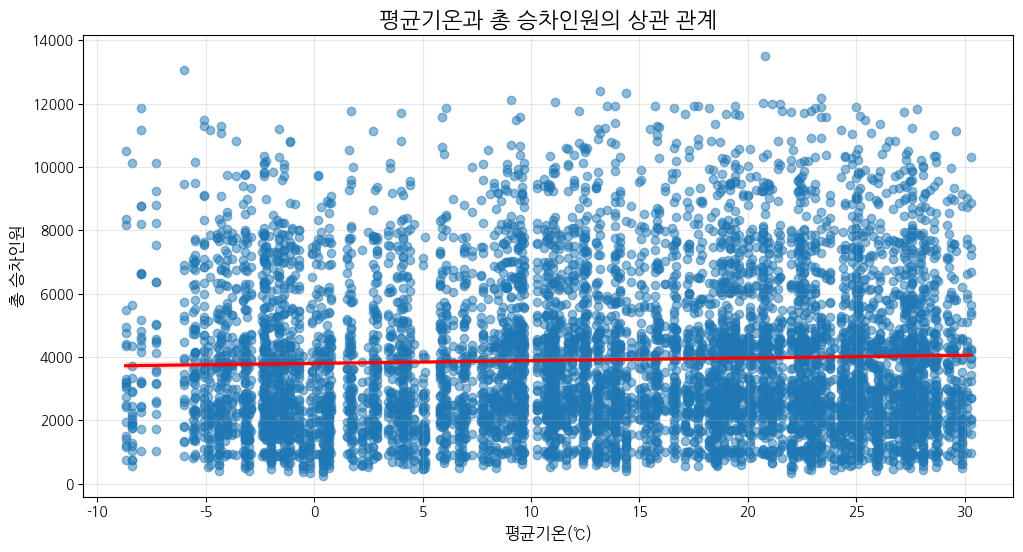

In [93]:
import seaborn as sns

# 승차 인원 합계 계산
merged_df_2022['총승차인원'] = merged_df_2022[[f'CNT{str(i).zfill(2)}' for i in range(1, 25)]].sum(axis=1)

# 1. 평균기온과 총승차인원 산점도
plt.figure(figsize=(12, 6))
sns.regplot(x='평균기온(℃)', y='총승차인원', data=merged_df_2022, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('평균기온과 총 승차인원의 상관 관계', fontsize=16)
plt.xlabel('평균기온(℃)', fontsize=12)
plt.ylabel('총 승차인원', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


<ipython-input-94-bb87a729f0ec>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='평균기온구간', y='총승차인원', data=merged_df_2022, ci='sd', palette='Set2')
<ipython-input-94-bb87a729f0ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='평균기온구간', y='총승차인원', data=merged_df_2022, ci='sd', palette='Set2')


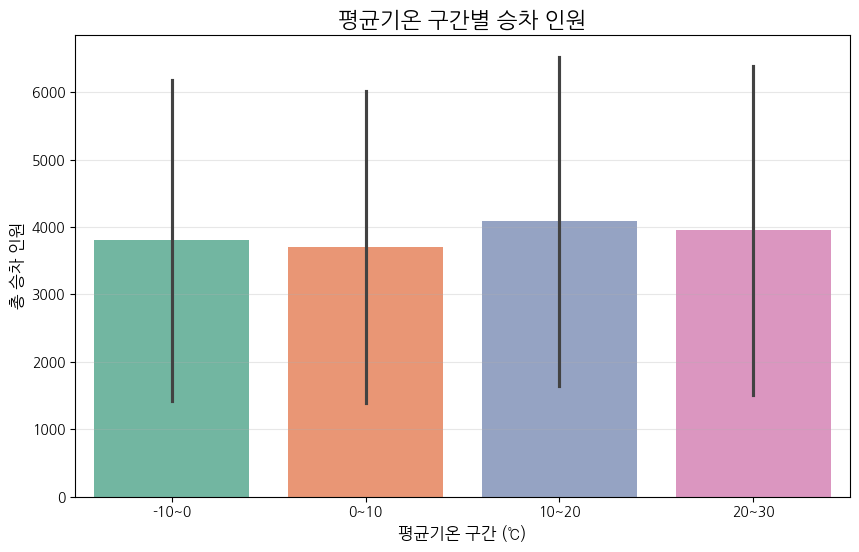

In [94]:
# 3. 기상 조건(예: 평균기온 구간)별 평균 승차 인원 막대 그래프
merged_df_2022['평균기온구간'] = pd.cut(merged_df_2022['평균기온(℃)'], bins=[-10, 0, 10, 20, 30], labels=['-10~0', '0~10', '10~20', '20~30'])

plt.figure(figsize=(10, 6))
sns.barplot(x='평균기온구간', y='총승차인원', data=merged_df_2022, ci='sd', palette='Set2')
plt.title('평균기온 구간별 승차 인원', fontsize=16)
plt.xlabel('평균기온 구간 (℃)', fontsize=12)
plt.ylabel('총 승차 인원', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### 강수량과 승차인원의 관계 확인

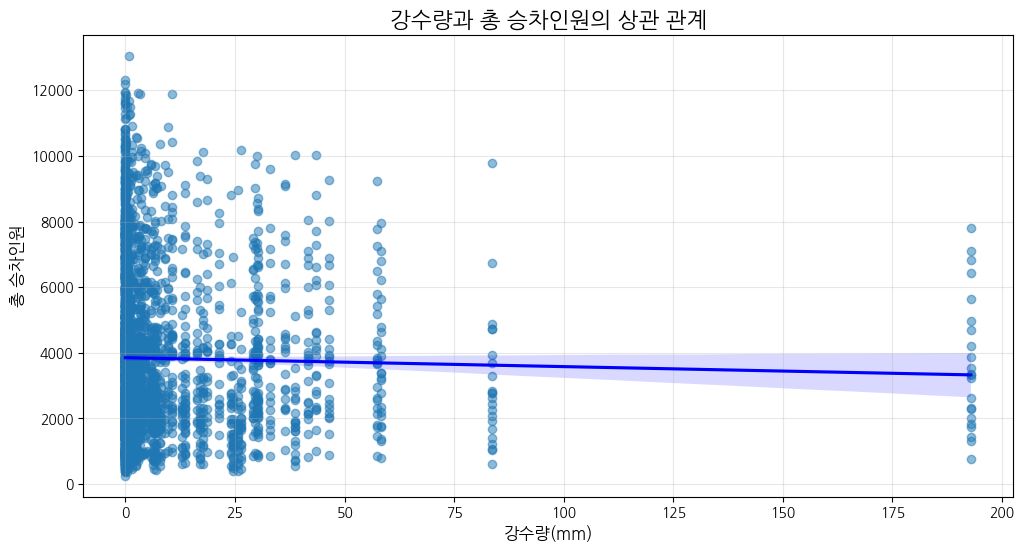

In [34]:
# 2. 강수량에 따른 승차 인원 산점도
plt.figure(figsize=(12, 6))
sns.regplot(x='강수량(mm)', y='총승차인원', data=merged_df_2022, scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'})
plt.title('강수량과 총 승차인원의 상관 관계', fontsize=16)
plt.xlabel('강수량(mm)', fontsize=12)
plt.ylabel('총 승차인원', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

<ipython-input-35-64d9c4c9e5f3>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_total_passengers_by_month = merged_df_2023.groupby(['Year_Month', 'rainfall_category'])['총승차인원'].sum().reset_index()


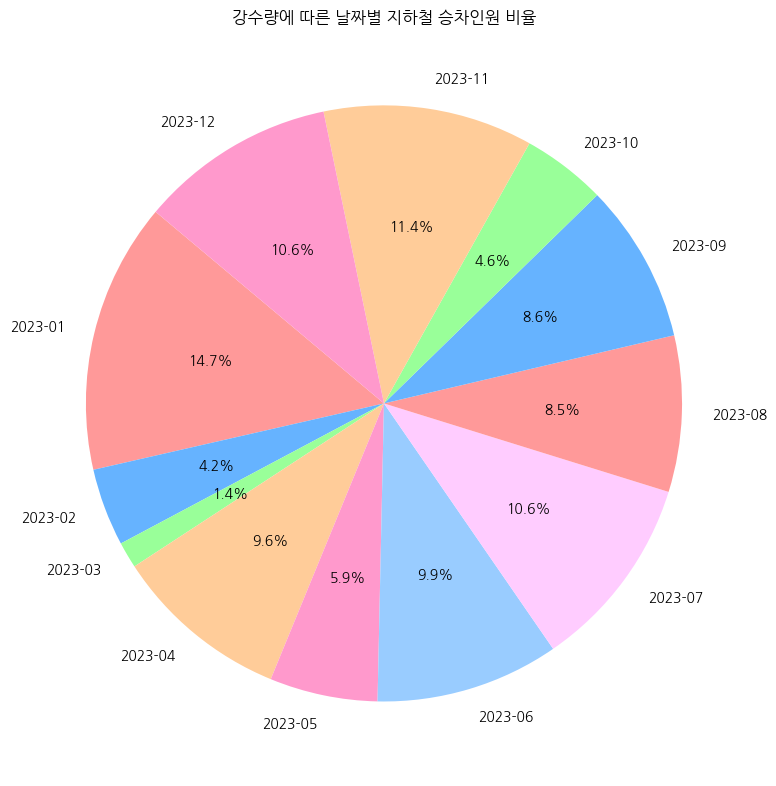

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df_2023['총승차인원'] = merged_df_2023[[f'CNT{str(i).zfill(2)}' for i in range(1, 25)]].sum(axis=1)

# 강수량 구간 설정
bins = [0, 30]
labels = ['0-30mm']

# 강수량 구간 분류
merged_df_2023['rainfall_category'] = pd.cut(merged_df_2023['강수량(mm)'], bins=bins, labels=labels, right=False)

# 날짜를 datetime으로 변환
merged_df_2023['BUSINESS_DAY'] = pd.to_datetime(merged_df_2023['BUSINESS_DAY'])

# 월별로 그룹화하여 총 승차인원 합계 계산
merged_df_2023['Year_Month'] = merged_df_2023['BUSINESS_DAY'].dt.to_period('M')  # 'YYYY-MM' 형식으로 변환
rainfall_total_passengers_by_month = merged_df_2023.groupby(['Year_Month', 'rainfall_category'])['총승차인원'].sum().reset_index()

# 강수량 구간별 승차인원 비율 계산
rainfall_total_passengers_by_month = rainfall_total_passengers_by_month[rainfall_total_passengers_by_month['rainfall_category'] == '0-30mm']

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(
    rainfall_total_passengers_by_month['총승차인원'],
    labels=rainfall_total_passengers_by_month['Year_Month'].astype(str),  # 월별 날짜 형식으로 라벨 표시
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff', '#ffccff']  # 색상 변경
)

# 제목 추가
plt.title('강수량에 따른 날짜별 지하철 승차인원 비율')
plt.tight_layout()
plt.show()

#### 기상 조건은 승차 수요와 관계 없으므로 변수에서 제외

In [95]:
merged_df_2022.drop(['평균기온(℃)'], axis=1, inplace=True)
merged_df_2022.drop(['최고기온(℃)'], axis=1, inplace=True)
merged_df_2022.drop(['최저기온(℃)'], axis=1, inplace=True)
merged_df_2022.drop(['강수량(mm)'], axis=1, inplace=True)
merged_df_2022.drop(['일시'], axis=1, inplace=True)

In [96]:
# 'BUSINESS_DAY' 열을 datetime 형식으로 변환
merged_df_2022['BUSINESS_DAY'] = pd.to_datetime(merged_df_2022['BUSINESS_DAY'])

# 연, 월, 일을 각각 새로운 열로 추가
merged_df_2022['연'] = merged_df_2022['BUSINESS_DAY'].dt.year
merged_df_2022['월'] = merged_df_2022['BUSINESS_DAY'].dt.month
merged_df_2022['일'] = merged_df_2022['BUSINESS_DAY'].dt.day
merged_df_2022

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,Unnamed: 8,\t지점번호,지점명_y,1시간최다강수량(mm),1시간최다강수량시각,총승차인원,평균기온구간,연,월,일
0,2022-01-01,1101,0,0,0,0,36,54,55,78,...,12.3,\t133,대전,NaN,NaN,1747,-10~0,2022,1,1
1,2022-01-01,1102,0,0,0,0,21,14,25,26,...,12.3,\t133,대전,NaN,NaN,609,-10~0,2022,1,1
2,2022-01-01,1103,0,0,0,0,19,43,53,78,...,12.3,\t133,대전,NaN,NaN,1564,-10~0,2022,1,1
3,2022-01-01,1104,0,0,0,2,13,23,55,105,...,12.3,\t133,대전,NaN,NaN,5349,-10~0,2022,1,1
4,2022-01-01,1105,0,0,0,0,12,16,16,39,...,12.3,\t133,대전,NaN,NaN,3942,-10~0,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,2022-12-31,1118,0,0,0,0,10,11,45,84,...,9.1,\t133,대전,NaN,NaN,1402,-10~0,2022,12,31
8026,2022-12-31,1119,0,0,0,0,11,40,54,79,...,9.1,\t133,대전,NaN,NaN,1757,-10~0,2022,12,31
8027,2022-12-31,1120,0,0,0,0,32,39,60,141,...,9.1,\t133,대전,NaN,NaN,3101,-10~0,2022,12,31
8028,2022-12-31,1121,0,0,0,0,12,22,50,82,...,9.1,\t133,대전,NaN,NaN,1390,-10~0,2022,12,31


#### 월별 변화와 승차 수요 관계 확인

<ipython-input-38-e767b98bbe34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_1112['월'] = pd.to_datetime(station_1112['BUSINESS_DAY']).dt.to_period('M')  # '2022-01', '2022-02' 형식


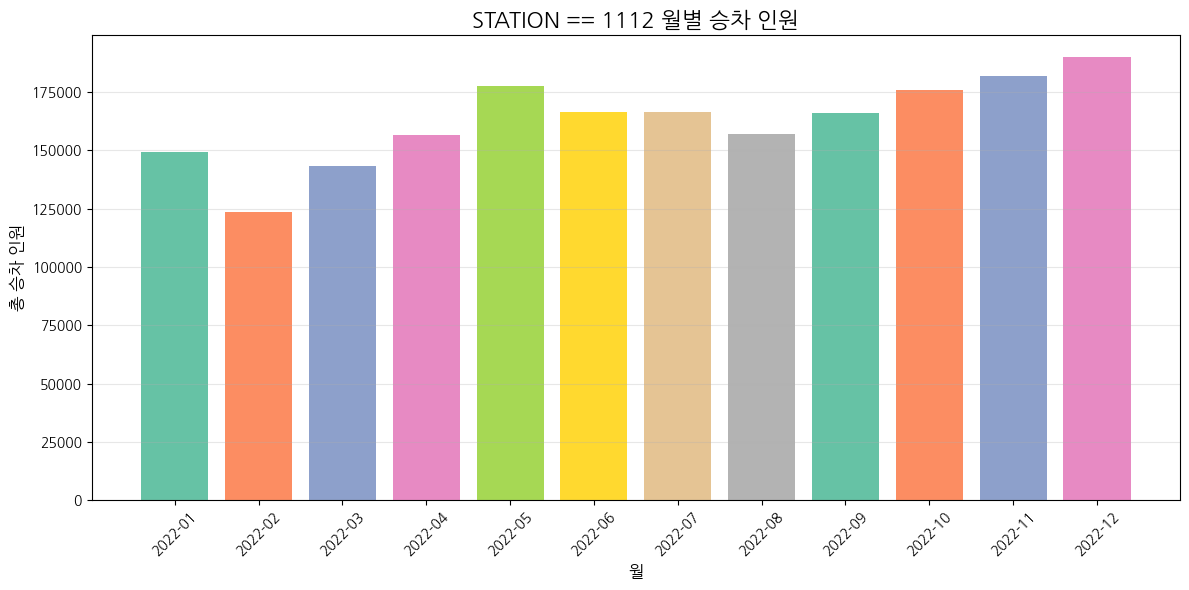

In [38]:
merged_df_2022['총승차인원'] = merged_df_2022[[f'CNT{str(i).zfill(2)}' for i in range(1, 25)]].sum(axis=1)  # 총승차인원 계산

# 특정 역(STATION == 1112) 필터링
station_1112 = merged_df_2022[merged_df_2022['STATION_NO'] == 1112]

# 날짜 컬럼에서 월 추출
station_1112['월'] = pd.to_datetime(station_1112['BUSINESS_DAY']).dt.to_period('M')  # '2022-01', '2022-02' 형식

# 월별 총승차인원 집계
monthly_data = station_1112.groupby('월')['총승차인원'].sum().reset_index()

# 색상 팔레트 설정 (Seaborn 활용)
colors = sns.color_palette("Set2", len(monthly_data))  # 10개의 고유 색상 사용

# 그래프 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_data['월'].astype(str), monthly_data['총승차인원'], color=colors)
plt.title('STATION == 1112 월별 승차 인원', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 승차 인원', fontsize=12)
plt.xticks(rotation=45)  # 월 라벨 각도 조정
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
event

,행사 시작일,행사 종료일,역사,행사구분,단체명,문화행사명,Unnamed: 6,Unnamed: 7,START_DATE,END_DATE,STATION_NO
0,2021-01-01,2021-01-15,대전역,전시,개인전,조선소나무사진전시회,NaN,NaN,2021-01-01,2021-01-15,1104
1,2021-01-11,2021-01-22,판암역,전시,판암사회복지관,웰 에이징 특화 프로그램 실버 패션쇼 화보 전시,NaN,NaN,2021-01-11,2021-01-22,1101
2,2021-01-18,2021-01-29,시청역,전시,대전서구정신건강복지센터,코로나 속 마음건강챙김 공모전 작품전시회,NaN,NaN,2021-01-18,2021-01-29,1111
3,2021-01-29,2021-02-09,구암역,전시,유성구정신건강복지센터,코로나속 마음건강챙김 공모전 수상작 작품전시회,NaN,NaN,2021-01-29,2021-02-09,1117
4,2021-02-01,2021-03-31,노은역,전시,대전유성소방서,심폐소생술 체험관 운영,NaN,NaN,2021-02-01,2021-03-31,1120
...,...,...,...,...,...,...,...,...,...,...,...
569,2024-10-27,2024-10-27,월드컵경기장역,축구,축구,축구,NaN,NaN,2024-10-27,2024-10-27,1119
570,2024-10-28,2024-10-28,노은역,기타,한국효문화진흥원,역사 내 칭찬감사캠페인,NaN,NaN,2024-10-28,2024-10-28,1120
571,2024-10-28,2024-10-28,반석역,기타,한국효문화진흥원,역사 내 칭찬감사캠페인,NaN,NaN,2024-10-28,2024-10-28,1122
572,2024-11-01,2024-11-03,정부청사역,기타,와인축제,와인축제,NaN,NaN,2024-11-01,2024-11-03,1112


#### '요일'과 승차 수요의 관계 확인

In [40]:
# 일자 데이터에서 요일 추출
merged_df_2022['요일'] = pd.to_datetime(merged_df_2022['BUSINESS_DAY']).dt.day_name()

In [41]:
merged_df_2022['요일'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

<ipython-input-42-1af5c437d303>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


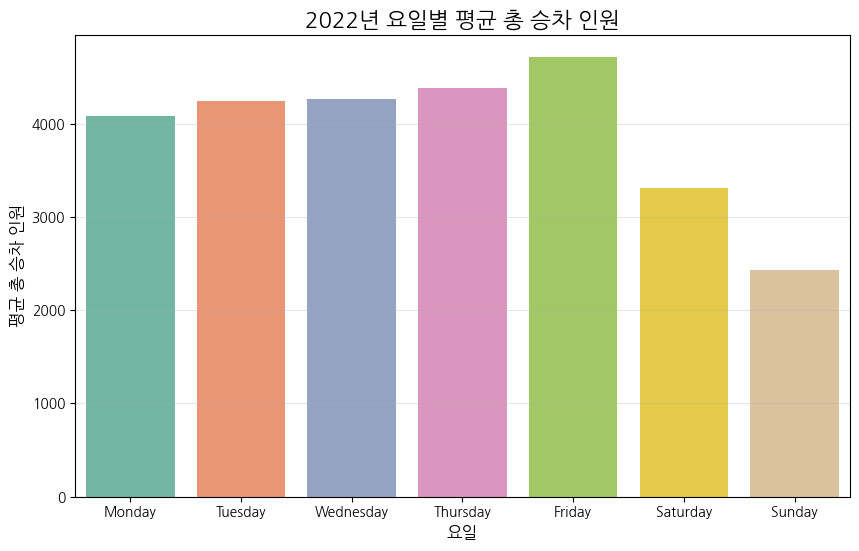

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 요일별 총 승객 수 평균 계산
weekday_avg = merged_df_2022.groupby('요일')['총승차인원'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# 2. 막대그래프 시각화
plt.figure(figsize=(10, 6))
# 다양한 색상 팔레트 사용
sns.barplot(
    x=weekday_avg.index,
    y=weekday_avg.values,
    palette=sns.color_palette("Set2", n_colors=7)  # Set3 팔레트 사용
)

# 3. 그래프 꾸미기
plt.title('2022년 요일별 평균 총 승차 인원', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('평균 총 승차 인원', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [43]:
merged_df_2022

,BUSINESS_DAY,STATION_NO,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,CNT08,...,\t지점번호,지점명_y,1시간최다강수량(mm),1시간최다강수량시각,총승차인원,평균기온구간,연,월,일,요일
0,2022-01-01,1101,0,0,0,0,36,54,55,78,...,\t133,대전,NaN,NaN,1747,-10~0,2022,1,1,Saturday
1,2022-01-01,1102,0,0,0,0,21,14,25,26,...,\t133,대전,NaN,NaN,609,-10~0,2022,1,1,Saturday
2,2022-01-01,1103,0,0,0,0,19,43,53,78,...,\t133,대전,NaN,NaN,1564,-10~0,2022,1,1,Saturday
3,2022-01-01,1104,0,0,0,2,13,23,55,105,...,\t133,대전,NaN,NaN,5349,-10~0,2022,1,1,Saturday
4,2022-01-01,1105,0,0,0,0,12,16,16,39,...,\t133,대전,NaN,NaN,3942,-10~0,2022,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,2022-12-31,1118,0,0,0,0,10,11,45,84,...,\t133,대전,NaN,NaN,1402,-10~0,2022,12,31,Saturday
8026,2022-12-31,1119,0,0,0,0,11,40,54,79,...,\t133,대전,NaN,NaN,1757,-10~0,2022,12,31,Saturday
8027,2022-12-31,1120,0,0,0,0,32,39,60,141,...,\t133,대전,NaN,NaN,3101,-10~0,2022,12,31,Saturday
8028,2022-12-31,1121,0,0,0,0,12,22,50,82,...,\t133,대전,NaN,NaN,1390,-10~0,2022,12,31,Saturday


In [44]:
event = pd.read_csv('/content/대전 행사.csv', encoding='euc-kr')

event['START_DATE'] = pd.to_datetime(event['행사 시작일'])
event['END_DATE'] = pd.to_datetime(event['행사 종료일'])


# 2. 행사 데이터 처리
# 행사 기간을 날짜 리스트로 확장
event_dates = []
for _, row in event.iterrows():
    event_dates.extend(pd.date_range(start=row['START_DATE'], end=row['END_DATE']))

event_dates = pd.DataFrame({'DATE': event_dates, 'EVENT': 1}).drop_duplicates()

In [45]:
from scipy.stats import ttest_ind

# 3. 승차량 데이터 처리
# 승차량 데이터를 날짜별 총합으로 집계
hourly_columns = [f'CNT{i:02d}' for i in range(1, 25)]
df['TOTAL_RIDERSHIP'] = df[hourly_columns].sum(axis=1)
daily_ridership = df.groupby('BUSINESS_DAY')['TOTAL_RIDERSHIP'].sum().reset_index()

# 4. 데이터 병합
# 날짜를 기준으로 행사 정보와 승차량 데이터 병합
merged_data = pd.merge(daily_ridership, event_dates, how='left', left_on='BUSINESS_DAY', right_on='DATE')
merged_data['EVENT'].fillna(0, inplace=True)  # 비행사일은 0으로 설정
merged_data.drop(columns=['DATE'], inplace=True)

# 5. 유의미성 분석
# 행사일과 비행사일의 승차량 분포 비교
event_days = merged_data[merged_data['EVENT'] == 1]['TOTAL_RIDERSHIP']
non_event_days = merged_data[merged_data['EVENT'] == 0]['TOTAL_RIDERSHIP']

<ipython-input-45-daf5b8b65d99>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['EVENT'].fillna(0, inplace=True)  # 비행사일은 0으로 설정


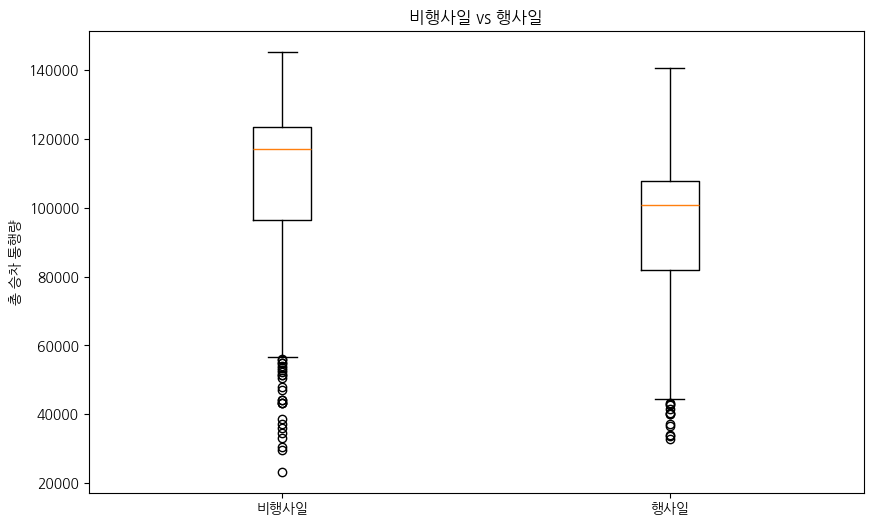

In [46]:
# t-test로 평균 차이 검정
t_stat, p_value = ttest_ind(event_days, non_event_days, equal_var=False)

# 6. 결과 시각화
plt.figure(figsize=(10, 6))
plt.boxplot([non_event_days, event_days], labels=['비행사일', '행사일'])
plt.title('비행사일 vs 행사일')
plt.ylabel('총 승차 통행량')
plt.show()

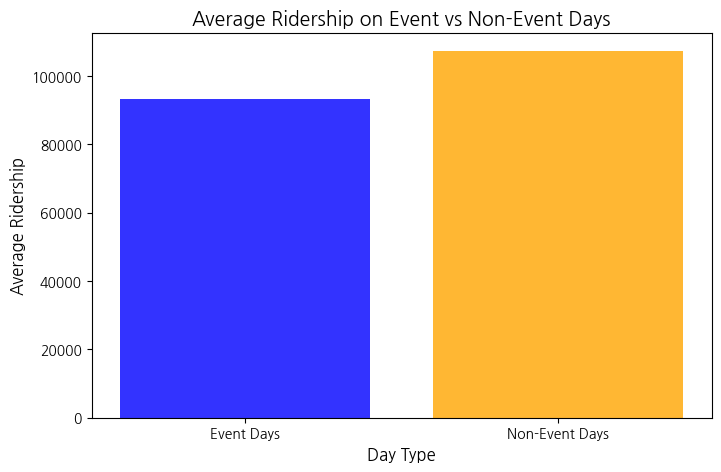

In [47]:
# 1. 행사 있는 날과 없는 날로 데이터 분리
event_days = merged_data[merged_data['EVENT'] == 1]
non_event_days = merged_data[merged_data['EVENT'] == 0]

# 2. 각 그룹의 평균 승차량 계산
event_avg = event_days['TOTAL_RIDERSHIP'].mean()
non_event_avg = non_event_days['TOTAL_RIDERSHIP'].mean()

# 3. 막대그래프 그리기
labels = ['Event Days', 'Non-Event Days']
averages = [event_avg, non_event_avg]

plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=['blue', 'orange'], alpha=0.8)
plt.title('Average Ridership on Event vs Non-Event Days', fontsize=14)
plt.ylabel('Average Ridership', fontsize=12)
plt.xlabel('Day Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

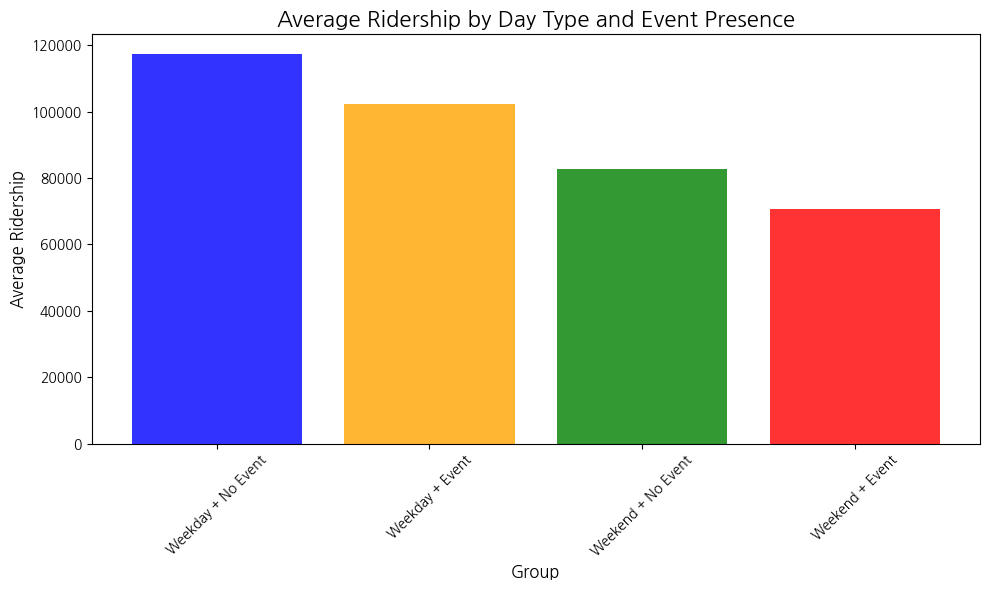

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 평일/주말 여부 추가
merged_data['BUSINESS_DAY'] = pd.to_datetime(merged_data['BUSINESS_DAY'])  # 날짜 형식 변환
merged_data['WEEKEND'] = merged_data['BUSINESS_DAY'].dt.weekday >= 5  # 토/일은 True (주말)

# 2. 그룹화하여 평균 계산
grouped = merged_data.groupby(['WEEKEND', 'EVENT'])['TOTAL_RIDERSHIP'].mean().reset_index()
grouped['Group'] = grouped['WEEKEND'].map({False: 'Weekday', True: 'Weekend'}) + \
                   ' + ' + grouped['EVENT'].map({0: 'No Event', 1: 'Event'})

# 3. 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped['Group'], grouped['TOTAL_RIDERSHIP'], color=['blue', 'orange', 'green', 'red'], alpha=0.8)
plt.title('Average Ridership by Day Type and Event Presence', fontsize=16)
plt.ylabel('Average Ridership', fontsize=12)
plt.xlabel('Group', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#### 공휴일과 승차 통행량의 관계 확인

In [51]:
holiday.drop(['비고'], axis=1, inplace=True)

In [52]:
# 데이터 준비
data = df.copy()

# 그룹별 평균 승차량 계산
grouped = data.groupby('is_holiday')['TOTAL_RIDERSHIP'].mean().reset_index()

# 'is_holiday' 값을 텍스트로 변경 (0은 'Non-Holiday', 1은 'Holiday')
grouped['is_holiday'] = grouped['is_holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Bar Chart 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='is_holiday', y='TOTAL_RIDERSHIP', palette='Set2')
plt.title('Average Ridership (Holiday vs Non-Holiday)')
plt.xlabel('Holiday')
plt.ylabel('Average Total Ridership')
plt.show()

KeyError: 'is_holiday'

### 연도별 정부청사 역 승차인원 확인

In [99]:
# 시간대별 승차 데이터 합산하여 '승차' 컬럼 생성
df1['승차'] = df1[[f'CNT{str(i).zfill(2)}' for i in range(0, 24)]].sum(axis=1)
df2['승차'] = df2[[f'CNT{str(i).zfill(2)}' for i in range(0, 24)]].sum(axis=1)
df3['승차'] = df3[[f'CNT{str(i).zfill(2)}' for i in range(0, 24)]].sum(axis=1)
df4['승차'] = df4[[f'CNT{str(i).zfill(2)}' for i in range(0, 24)]].sum(axis=1)

In [100]:
# station_no와 역 이름 매핑 딕셔너리
station_map = {
    1101: '판암', 1102: '신흥', 1103: '대동', 1104: '대전', 1105: '중앙로',
    1106: '중구청', 1107: '서대전네거리', 1108: '오룡', 1109: '용문', 1110: '탄방',
    1111: '시청', 1112: '정부청사', 1113: '갈마', 1114: '월평', 1115: '갑천',
    1116: '유성온천', 1117: '구암', 1118: '현충원', 1119: '월드컵경기장', 1120: '노은',
    1121: '지족', 1122: '반석'
}

# 'STATION_NO' 컬럼을 역 이름으로 변환
df1['STATION_NAME'] = df1['STATION_NO'].map(station_map)
df2['STATION_NAME'] = df2['STATION_NO'].map(station_map)
df3['STATION_NAME'] = df3['STATION_NO'].map(station_map)
df4['STATION_NAME'] = df4['STATION_NO'].map(station_map)

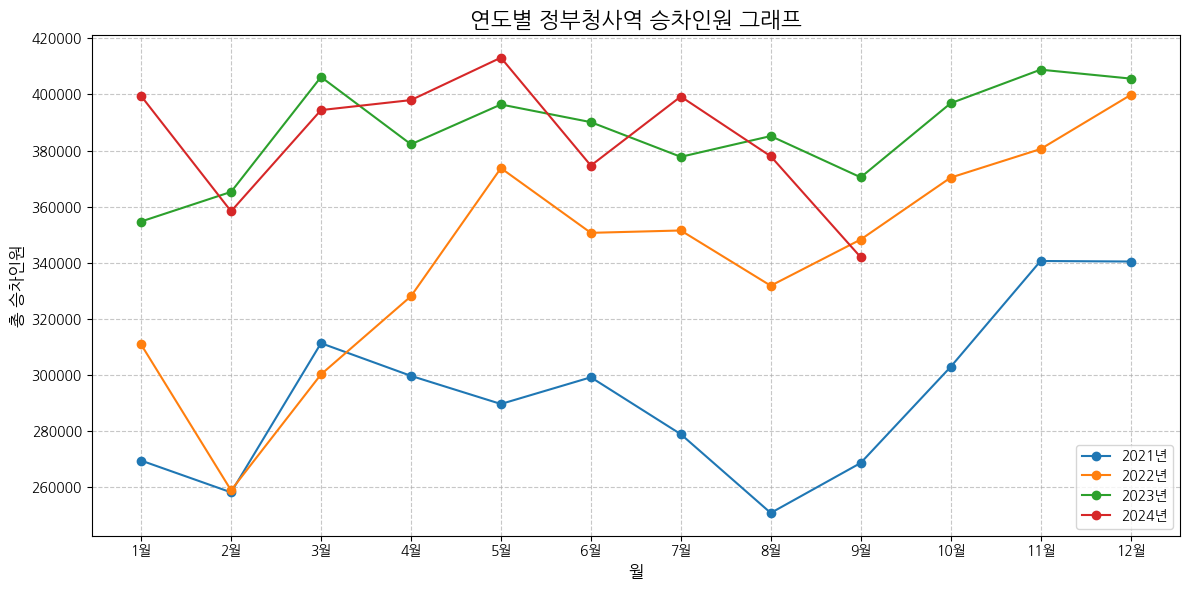

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터프레임 리스트 (df1, df2, df3, df4는 연도별 데이터)
df_list = [df1, df2, df3, df4]  # 각각 2021, 2022, 2023, 2024 데이터
years = [2021, 2022, 2023, 2024]  # 각 데이터프레임의 연도

# STATION_NO 1101에 대한 월별 승차 인원 추이 계산
station_name = '정부청사'
monthly_data = {}

for df, year in zip(df_list, years):
    # STATION_NAME이 '정부청사'인 데이터 필터링
    filtered = df[df['STATION_NAME'] == station_name].copy()
    # BUSINESS_DAY를 datetime 형식으로 변환 후 월 추출
    # format을 '%Y-%m-%d'로 변경하여 하이픈을 포함한 날짜 형식을 처리
    filtered['MONTH'] = pd.to_datetime(filtered['BUSINESS_DAY'], format='%Y%m%d').dt.month
    # 월별 승차 인원 합산
    monthly_totals = filtered.groupby('MONTH')['승차'].sum()
    monthly_data[year] = monthly_totals

# 그래프 생성
plt.figure(figsize=(12, 6))

for year, monthly_totals in monthly_data.items():
    plt.plot(monthly_totals.index, monthly_totals.values, marker='o', label=f'{year}년')

# 그래프 꾸미기
plt.title('연도별 정부청사역 승차인원 그래프', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 승차인원', fontsize=12)
plt.xticks(range(1, 13), labels=[f'{m}월' for m in range(1, 13)])
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd


# 날짜 처리
df['BUSINESS_DAY'] = pd.to_datetime(df['BUSINESS_DAY'])

# 요일 매핑
weekday_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['WEEKDAY'] = df['WEEKDAY'].map(weekday_mapping)  # Apply mapping to filtered_data

# 1시부터 4시 제외
features = ['WEEKDAY', 'is_holiday', 'EVENT', 'EVENT_FLAG'] + [f'CNT{i:02d}' for i in range(4, 25)]  # 1시부터 4시 제외
target = [f'CNT{i:02d}' for i in range(4, 25)]  # 1시부터 4시 제외한 시간대 승차량을 타겟으로 설정

# 필터링된 데이터로 학습 및 테스트 데이터 준비
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 하이퍼 파라미터 값 조정
xgb_model = XGBRegressor(
    random_state=42,
    max_depth=4,  # 트리 깊이를 4으로 설정
    learning_rate=0.01,  # 학습률을 낮추어 천천히 학습
    n_estimators=500,  # 트리의 개수를 늘려 모델을 더 많이 학습
    subsample=0.8,  # 데이터의 80%만 사용하여 학습
    colsample_bytree=0.8,  # 각 트리마다 특성의 80%만 사용
    lambda_=1,  # L2 정규화
    alpha=0.5,  # L1 정규화
    min_child_weight=1,  # 리프 노드에서 최소 가중치
    gamma=0.1,  # 트리 분할에 필요한 최소 손실 감소값
    n_jobs=-1,  # CPU의 모든 코어를 사용하여 학습
)

# 모델 학습
xgb_model.fit(
    X_train, y_train,
    verbose=True
)

In [66]:
# 예측
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False, multioutput='raw_values')
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False, multioutput='raw_values')
train_mae = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
test_mae = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')

# 학습 데이터 테스트 데이터 RMSE와 MAE 출력
for i, hour in enumerate(range(4, 25)):  # 4시부터 24시까지 시간대 출력
    print(f"CNT{hour:02d} - Train RMSE: {train_rmse[i-5]:.2f}, Test RMSE: {test_rmse[i-5]:.2f}")
    print(f"CNT{hour:02d} - Train MAE: {train_mae[i-5]:.2f}, Test MAE: {test_mae[i-5]:.2f}")

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 피처 중요도 가져오기
feature_importances = xgb_model.feature_importances_

# 중요도와 피처 이름을 묶어서 정렬
sorted_indices = np.argsort(feature_importances)[::-1]  # 중요도를 기준으로 내림차순 정렬
top_10_indices = sorted_indices[:10]  # 상위 10개 인덱스 선택
top_10_features = [features[i] for i in top_10_indices]  # 상위 10개 피처 이름
top_10_importances = feature_importances[top_10_indices]  # 상위 10개 중요도 값

# 시각화
plt.barh(top_10_features, top_10_importances)
plt.xlabel('Feature Importance')
plt.title('XGBoost Top 5 Feature Importance')
plt.gca().invert_yaxis()  # 상위 중요도가 위에 오도록 Y축 반전
plt.show()


# 결과 도출

In [46]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from datetime import datetime


merged_data.rename(columns={'CNT24': 'CNT00'}, inplace=True)

# 입력 데이터프레임: df
merged_data['BUSINESS_DAY'] = pd.to_datetime(merged_data['BUSINESS_DAY'])

# 날짜 설정
target_date = datetime(2024, 12, 1)
target_weekday = target_date.weekday()  # 0=월요일, 6=일요일

# 1시부터 4시 제외한 시간대 설정
time_columns = [f'CNT{i:02d}' for i in range(0, 24)]
features = ['is_holiday', 'EVENT', 'EVENT_FLAG'] + time_columns  # WEEKDAY를 원-핫 인코딩으로 처리
target_columns = time_columns

# 결과 저장용 데이터프레임
all_predictions = pd.DataFrame()

# 1. 행사 여부 플래그(EVENT_FLAG) 추가
merged_data['EVENT_FLAG'] = merged_data['EVENT_WEIGHT'].apply(lambda x: 1 if x > 0 else 0)


# 각 역별로 데이터 필터링 및 모델 학습
for station in merged_data['STATION_NO'].unique():
    # 해당 역의 데이터 필터링
    station_data = merged_data[merged_data['STATION_NO'] == station].copy()

    # WEEKDAY 컬럼을 정수형으로 변환 (0=월요일, 6=일요일)
    station_data['WEEKDAY'] = station_data['WEEKDAY'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})

    # 주말/평일 플래그 추가
    station_data['is_weekend'] = station_data['WEEKDAY'].apply(lambda x: 1 if x in [5, 6] else 0)

    # 공휴일과 요일 상호작용 항목 추가
    station_data['holiday_weekday_interaction'] = station_data['is_holiday'] * station_data['WEEKDAY']

    # holiday_weekday_interaction 컬럼을 정수형으로 변환
    station_data['holiday_weekday_interaction'] = station_data['holiday_weekday_interaction'].astype(int)

    # 원-핫 인코딩: WEEKDAY 변수에 대해 원-핫 인코딩 적용
    weekday_dummies = pd.get_dummies(station_data['WEEKDAY'], prefix='WEEKDAY')
    station_data = pd.concat([station_data, weekday_dummies], axis=1)

    # 학습 데이터 준비: 원-핫 인코딩된 WEEKDAY 컬럼을 추가한 후 features에 포함시킴
    X = station_data[features + [f'WEEKDAY_{i}' for i in range(7)] + ['is_weekend', 'holiday_weekday_interaction']]
    y = station_data[target_columns]

    # 학습 데이터 분리 (랜덤 추출)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # XGBoost 모델 초기화
    xgb_model = XGBRegressor(
        random_state=42,
        max_depth=4,
        learning_rate=0.01,
        n_estimators=500,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1,
        alpha=0.5,
        min_child_weight=1,
        gamma=0.1,
        n_jobs=-1,
        eval_metric='mae'
    )
    # 교차검증 수행
    cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-Validation MAE: {-cv_scores.mean():.4f}")

    # 모델 학습
    xgb_model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],  # 검증 데이터 설정
    early_stopping_rounds=50,  # 검증 손실이 50번 동안 개선되지 않으면 학습 중단
    verbose=True  # 학습 과정을 출력
    )
    # 최근 데이터 기반 예측 입력값 생성
    recent_data = station_data.iloc[-5].copy()

    # 원-핫 인코딩된 WEEKDAY 컬럼 추가
    input_data = pd.DataFrame({
        'STATION_NO': [station],
        'is_holiday': [0],  # 공휴일 여부는 필요 시 설정 (12월 1일은 공휴일x)
        'EVENT': [1],       # 행사 여부는 필요 시 설정 (행사가 있지만 규모가 작음 1)
        'EVENT_FLAG': [1],  # 행사 플래그는 필요 시 설정
        'is_weekend': [1],  # 일요일이므로 주말로 설정
        'holiday_weekday_interaction': [1 * target_weekday]  # 공휴일과 요일 상호작용
    })

    # 최근 시간대 데이터 추가
    for col in time_columns:
        input_data[col] = recent_data[col]

    # 원-핫 인코딩된 WEEKDAY 컬럼 추가
    for i in range(7):
        input_data[f'WEEKDAY_{i}'] = [1 if i == target_weekday else 0]

    # 예측 수행
    prediction = xgb_model.predict(input_data[features + [f'WEEKDAY_{i}' for i in range(7)] + ['is_weekend', 'holiday_weekday_interaction']].values)

    # 예측 결과 저장
    station_prediction = pd.DataFrame({
        'BUSINESS_DAY': [target_date.strftime('%Y%m%d')],
        'STATION_NO': [station],
        **{col: [pred] for col, pred in zip(target_columns, prediction[0])}
    })

    all_predictions = pd.concat([all_predictions, station_prediction], ignore_index=True)

# 결과 저장
result_columns = ['BUSINESS_DAY', 'STATION_NO'] + time_columns
output_predictions = all_predictions[result_columns]

# 예측 결과 요약
print(f"Prediction Summary for {target_date.strftime('%Y-%m-%d')}:")
print(f"Total Stations Predicted: {len(output_predictions['STATION_NO'].unique())}")

KeyError: "['EVENT_FLAG'] not in index"

In [ ]:
# result_format.csv 파일 읽기
result_format_path = '/content/drive/MyDrive/Training/Result_format.csv'  # result_format.csv 파일 경로
result_format = pd.read_csv(result_format_path)

# BUSINESS_DAY 데이터 타입 변환
result_format['BUSINESS_DAY'] = result_format['BUSINESS_DAY'].astype(str)  # 문자열로 변환
all_predictions['BUSINESS_DAY'] = all_predictions['BUSINESS_DAY'].astype(str)  # 문자열로 변환

# 예측값으로 데이터 교체
result_format = result_format.drop(columns=time_columns, errors='ignore')  # 기존 시간대 열 삭제 (필요 시)
result_format = result_format.merge(all_predictions, on=['BUSINESS_DAY', 'STATION_NO'], how='left')

In [ ]:
result_format

In [ ]:
# CNT00 컬럼을 제거하고 저장
cnt00_column = result_format.pop('CNT00')

# CNT23 뒤에 CNT00을 추가
result_format.insert(result_format.columns.get_loc('CNT23') + 1, 'CNT00', cnt00_column)

In [ ]:
result_format

In [ ]:
# 반올림 대상 열 선택
cnt_columns = [col for col in result_format.columns if col.startswith('CNT')]

# 데이터 타입을 float으로 변환
result_format[cnt_columns] = result_format[cnt_columns].astype(float)

# 반올림 적용 및 원본 데이터 반영
result_format[cnt_columns] = result_format[cnt_columns].round(2)

In [ ]:
result_format

## XGBoost 과적합 방지

12월 1일 데이터

In [50]:
pip install --upgrade xgboost


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from datetime import datetime

# 데이터 준비
merged_data.rename(columns={'CNT24': 'CNT00'}, inplace=True)
merged_data['BUSINESS_DAY'] = pd.to_datetime(merged_data['BUSINESS_DAY'])

# WEEKDAY 및 행사 플래그 추가
merged_data['WEEKDAY'] = merged_data['BUSINESS_DAY'].dt.weekday
merged_data['EVENT_FLAG'] = merged_data['EVENT_WEIGHT'].apply(lambda x: 1 if x > 0 else 0)
merged_data['EVENT'] = merged_data['EVENT_WEIGHT'].apply(lambda x: 1 if x > 0 else 0)

# 날짜 및 시간대 설정
target_date = datetime(2024, 12, 1)
target_weekday = target_date.weekday()  # 0=월요일, 6=일요일
time_columns = [f'CNT{i:02d}' for i in range(0, 24)]
features = ['is_holiday', 'EVENT', 'EVENT_FLAG'] + time_columns

# 결과 저장
all_predictions = pd.DataFrame()

# 각 역별 데이터 학습 및 예측
for station in merged_data['STATION_NO'].unique():
    station_data = merged_data[merged_data['STATION_NO'] == station].copy()
    station_data['is_weekend'] = station_data['WEEKDAY'].apply(lambda x: 1 if x in [5, 6] else 0)
    station_data['holiday_weekday_interaction'] = station_data['is_holiday'] * station_data['WEEKDAY']
    station_data['holiday_weekday_interaction'] = station_data['holiday_weekday_interaction'].astype(int)

    # 원-핫 인코딩
    weekday_dummies = pd.get_dummies(station_data['WEEKDAY'], prefix='WEEKDAY')
    station_data = pd.concat([station_data, weekday_dummies], axis=1)

    # 학습 데이터 준비
    X = station_data[features + [f'WEEKDAY_{i}' for i in range(7)] + ['is_weekend', 'holiday_weekday_interaction']]
    y = station_data[time_columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # DMatrix 생성
    dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
    dval = xgb.DMatrix(X_val_split, label=y_val_split)

    # XGBoost 파라미터
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'max_depth': 4,
        'learning_rate': 0.01,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_lambda': 1,
        'alpha': 0.5,
        'min_child_weight': 1,
        'gamma': 0.1,
        'random_state': 42
    }

    # 모델 학습
    evals = [(dtrain, 'train'), (dval, 'eval')]
    xgb_model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=500,
        evals=evals,
        early_stopping_rounds=50,
        verbose_eval=True
    )

    # 예측 수행
    recent_data = station_data.iloc[-1].copy()
    input_data = pd.DataFrame({
        'STATION_NO': [station],
        'is_holiday': [0],
        'EVENT': [1],
        'EVENT_FLAG': [1],
        'is_weekend': [1],
        'holiday_weekday_interaction': [1 * target_weekday]
    })

    for col in time_columns:
        input_data[col] = recent_data[col]
    for i in range(7):
        input_data[f'WEEKDAY_{i}'] = [1 if i == target_weekday else 0]

    # 예측 수행
    dinput = xgb.DMatrix(input_data[features + [f'WEEKDAY_{i}' for i in range(7)] + ['is_weekend', 'holiday_weekday_interaction']])
    prediction = xgb_model.predict(dinput)
    station_prediction = pd.DataFrame({
        'BUSINESS_DAY': [target_date.strftime('%Y%m%d')],
        'STATION_NO': [station],
        **{col: [pred] for col, pred in zip(time_columns, prediction[0])}
    })

    all_predictions = pd.concat([all_predictions, station_prediction], ignore_index=True)

# 결과 저장
result_columns = ['BUSINESS_DAY', 'STATION_NO'] + time_columns
output_predictions = all_predictions[result_columns]

# 결과 요약
print(f"Prediction Summary for {target_date.strftime('%Y-%m-%d')}:")
print(f"Total Stations Predicted: {len(output_predictions['STATION_NO'].unique())}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[2]	train-mae:74.54611	eval-mae:74.52370
[3]	train-mae:73.81053	eval-mae:73.78549
[4]	train-mae:73.08232	eval-mae:73.05771
[5]	train-mae:72.36131	eval-mae:72.33585
[6]	train-mae:71.64621	eval-mae:71.61904
[7]	train-mae:70.93999	eval-mae:70.90973
[8]	train-mae:70.24103	eval-mae:70.21004
[9]	train-mae:69.55172	eval-mae:69.51905
[10]	train-mae:68.86878	eval-mae:68.83206
[11]	train-mae:68.18971	eval-mae:68.15130
[12]	train-mae:67.51749	eval-mae:67.47827
[13]	train-mae:66.85084	eval-mae:66.81078
[14]	train-mae:66.19260	eval-mae:66.15123
[15]	train-mae:65.54250	eval-mae:65.50026
[16]	train-mae:64.89610	eval-mae:64.85490
[17]	train-mae:64.25921	eval-mae:64.21720
[18]	train-mae:63.62560	eval-mae:63.57967
[19]	train-mae:62.99944	eval-mae:62.95240
[20]	train-mae:62.38071	eval-mae:62.33415
[21]	train-mae:61.76778	eval-mae:61.72051
[22]	train-mae:61.16162	eval-mae:61.11452
[23]	train-mae:60.55816	eval-mae:60.50967
[24]	train-mae:59.96028	eval-mae:59.91091
[25]	t

In [44]:
import pandas as pd

# 파일 불러오기
file_path = '/content/output_20241201_20241201.csv'
data = pd.read_csv(file_path)

# 홀수행(하차 데이터) 제거: 행 인덱스가 홀수인 경우 삭제
data_even_rows = data.iloc[::2].reset_index(drop=True)  # 승차 데이터만 남김

# 결과 확인
data_even_rows.info(), data_even_rows.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       22 non-null     int64
 1   StationNo  22 non-null     int64
 2   entryflag  22 non-null     int64
 3   totalCnt   22 non-null     int64
 4   Cnt_00     22 non-null     int64
 5   Cnt_01     22 non-null     int64
 6   Cnt_02     22 non-null     int64
 7   Cnt_03     22 non-null     int64
 8   Cnt_04     22 non-null     int64
 9   Cnt_05     22 non-null     int64
 10  Cnt_06     22 non-null     int64
 11  Cnt_07     22 non-null     int64
 12  Cnt_08     22 non-null     int64
 13  Cnt_09     22 non-null     int64
 14  Cnt_10     22 non-null     int64
 15  Cnt_11     22 non-null     int64
 16  Cnt_12     22 non-null     int64
 17  Cnt_13     22 non-null     int64
 18  Cnt_14     22 non-null     int64
 19  Cnt_15     22 non-null     int64
 20  Cnt_16     22 non-null     int64
 21  Cnt_17     22 non-

(None,
        Date  StationNo  entryflag  totalCnt  Cnt_00  Cnt_01  Cnt_02  Cnt_03  \
 0  20241201        101          0         0       0       0       0       0   
 1  20241201        102          0         0       0       0       0       0   
 2  20241201        103          0         0       0       0       0       0   
 3  20241201        104          0         0       1       0       0       0   
 4  20241201        105          0         0       2       0       0       0   
 
    Cnt_04  Cnt_05  ...  Cnt_14  Cnt_15  Cnt_16  Cnt_17  Cnt_18  Cnt_19  \
 0       0      47  ...     211     173     172     150     126      72   
 1       0      23  ...      76      61      54      56      50      30   
 2       0      37  ...     167     134     153     139      84      89   
 3       0      14  ...     841    1006     974     987     717     771   
 4       0      20  ...     380     407     592     541     480     449   
 
    Cnt_20  Cnt_21  Cnt_22  Cnt_23  
 0      81      31    

In [61]:
print("Actual Data Columns:", actual_data.columns)
print("Predicted Data Columns:", predicted_data.columns)


Actual Data Columns: Index(['Date', 'StationNo', 'entryflag', 'totalCnt', 'Cnt_00', 'Cnt_01',
       'Cnt_02', 'Cnt_03', 'Cnt_04', 'Cnt_05', 'Cnt_06', 'Cnt_07', 'Cnt_08',
       'Cnt_09', 'Cnt_10', 'Cnt_11', 'Cnt_12', 'Cnt_13', 'Cnt_14', 'Cnt_15',
       'Cnt_16', 'Cnt_17', 'Cnt_18', 'Cnt_19', 'Cnt_20', 'Cnt_21', 'Cnt_22',
       'Cnt_23'],
      dtype='object')
Predicted Data Columns: Index(['BUSINESS_DAY', 'STATION_NO', 'CNT00', 'CNT01', 'CNT02', 'CNT03',
       'CNT04', 'CNT05', 'CNT06', 'CNT07', 'CNT08', 'CNT09', 'CNT10', 'CNT11',
       'CNT12', 'CNT13', 'CNT14', 'CNT15', 'CNT16', 'CNT17', 'CNT18', 'CNT19',
       'CNT20', 'CNT21', 'CNT22', 'CNT23'],
      dtype='object')


## 조건 후처리


*   1시부터 4시까지는 운행을 하지 않기 때문에 Count가 되면 안된다. 따라서 후처리 작업을 진행해 1시부터 4시까지 전부 값을 0으로 바꿔준다.



In [ ]:
# 변경할 열 목록
columns_to_reset = ['CNT01', 'CNT02', 'CNT03', 'CNT04']

# 해당 열 값을 전부 0으로 설정
result_format[columns_to_reset] = 0

In [ ]:
result_format

In [ ]:
output_file = '/content/drive/MyDrive/prediction2.csv'
result_format.to_csv(output_file, index=False)